In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
import matplotlib.pyplot as plt
import json 
import astropy

In [2]:
response_dict = {
    "#1" : 1,
    "#2" : 2,
    "#3" : 3,
    "#4" : 4,
    "#5" : 5,
    "No good match" : 0,
}

In [3]:
classification = Table.from_pandas(pd.read_csv(r'C:\Users\20xha\Documents\Caltech\Research\ZooniverseClassifications\zwicky-chemical-factory-classifications_ZTFI.csv'))

In [4]:
ccs_workflow = np.where(classification["workflow_name"] == "Core Collapse Supernovae")

In [5]:
classification[ccs_workflow][50]

classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
int64,str34,float64,str20,int64,str25,float64,str23,float64,float64,str1672,str532,str485,int64
294870524,ElisabethB,123.0,ef6b1d6d8363c5259b7b,16969,Core Collapse Supernovae,8.21,2020-12-15 17:44:42 UTC,--,--,"{""source"":""api"",""session"":""06c502ec1de2f48926d7dda9135525359515b594dbd954df80e23f50da52fcdd"",""viewport"":{""width"":1455,""height"":688},""started_at"":""2020-12-15T17:44:36.313Z"",""user_agent"":""Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"",""utc_offset"":""-3600"",""finished_at"":""2020-12-15T17:44:40.971Z"",""live_project"":true,""interventions"":{""opt_in"":true,""messageShown"":false},""user_language"":""en"",""user_group_ids"":[],""subject_dimensions"":[{""clientWidth"":935,""clientHeight"":525,""naturalWidth"":4800,""naturalHeight"":2700},null,null,null,null],""subject_selection_state"":{""retired"":false,""selected_at"":""2020-12-15T17:43:42.256Z"",""already_seen"":false,""selection_state"":""normal"",""finished_workflow"":false,""user_has_finished_workflow"":false},""workflow_translation_id"":""39739""}","[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""No good match""}]","{""53626571"":{""retired"":{""id"":74445392,""workflow_id"":16969,""classifications_count"":11,""created_at"":""2020-12-15T08:28:26.915Z"",""updated_at"":""2021-02-17T12:37:02.565Z"",""retired_at"":""2021-02-17T12:37:02.559Z"",""subject_id"":53626571,""retirement_reason"":""classification_count""},""z_snid"":0.024,""!ZTF_Name"":""ZTF19aamljom"",""z_snid_err"":0.005,""!ZTF_Version"":""ZTF19aamljom_20190419_P60_v1""}}",53626571


In [6]:
subject_ids_unique = np.unique(classification[ccs_workflow]["subject_ids"])

In [7]:
right_workflow = classification[ccs_workflow]

In [8]:
data_np = np.load(r'C:\Users\20xha\Documents\Caltech\Research\ZooniverseClassifications\zwicky-chemical-factory-classifications_ZTFI.npy', allow_pickle = True)

In [9]:
len(data_np[:,1][0])

1

In [10]:
data_array = []
for i in data_np:
    if(len(i[1]) > 10):
        data_array.append([i[0], right_workflow[i[1]]])

In [11]:
size = []
for i in data_np[:,1]:
    size.append(len(i))

In [12]:
exec("dict =" + data_array[0][1]["annotations"][0])

In [13]:
json.loads(data_array[0][1]["annotations"][0])[0]

{'task': 'T0',
 'task_label': 'Which spectrum is the best match?',
 'value': 'No good match'}

In [14]:
dict[0]["value"].split("#")[-1]

'No good match'

In [15]:
data_array[0][1]["annotations"]

"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""No good match""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#5""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#5""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""No good match""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":null}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#5""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#4""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""No good match""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#5""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""No good match""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""No good match""}]"


In [17]:
json.loads(data_array[0][1][0]["subject_data"])

{'53623564': {'retired': {'id': 74443175,
   'workflow_id': 16969,
   'classifications_count': 11,
   'created_at': '2020-12-15T07:45:08.635Z',
   'updated_at': '2021-03-20T20:10:35.871Z',
   'retired_at': '2021-03-20T20:10:35.864Z',
   'subject_id': 53623564,
   'retirement_reason': 'classification_count'},
  'z_snid': 0.007,
  '!ZTF_Name': 'AT2018hrg',
  'z_snid_err': 0.009,
  '!ZTF_Version': 'AT2018hrg_20181103_P60_v1'}}

In [18]:
ResultsTable_Zooniverse = Table(
                    names=("ZTF_Name", "Version", "subject_ids", "NoMatch", "#1", "#2", "#3", "#4", "#5"
                    ),
                    meta={"name": "Spectrum Results after Zooniverse"},
                    dtype=("U64", "U64", "int32", "int32", "int32", "int32", "int32", "int32", "int32"
                          )
                    )
for line in data_array:
    row = []
    data = line[1]
    metadata = json.loads(data[0]["subject_data"])[str(line[0])]
    row.append(metadata["!ZTF_Name"])
    row.append(metadata["!ZTF_Version"] + ".ascii")
    row.append(line[0])
    responses = [0, 0, 0, 0, 0, 0]
    for i in data:
        value = json.loads(i["annotations"])[0]["value"]
        if(value is not None):
            index = response_dict[value]
            responses[index] = responses[index] + 1
    row.extend(responses)
    ResultsTable_Zooniverse.add_row(row)

In [19]:
metadata = json.loads(data[0]["subject_data"])[str(line[0])]
value = json.loads(i["annotations"])[0]["value"]

In [20]:
np.sum(ResultsTable_Zooniverse["NoMatch"])

21010

In [21]:
np.sum(ResultsTable_Zooniverse["#1"])

24786

In [22]:
np.sum(ResultsTable_Zooniverse["#2"])

18503

In [23]:
np.sum(ResultsTable_Zooniverse["#3"])

17138

In [24]:
np.sum(ResultsTable_Zooniverse["#4"])

16830

In [25]:
np.sum(ResultsTable_Zooniverse["#5"])

16854

In [136]:
ResultsTable_Zooniverse.to_pandas().to_csv("FirstAnalysis.csv")

In [26]:
snidoutput = Table.from_pandas(pd.read_csv("SNID_2020_output.csv"))

In [27]:
joined_results = astropy.table.join(snidoutput, ResultsTable_Zooniverse)

In [28]:
ResultsTable_Zooniverse_Classes = Table(
                    names=("ZTF_Name", "Version", "subject_ids", 'Ia', 'Ia-norm', 'Ia-91T', 'Ia-91bg', 'Ia-csm', 'Ia-02cx', 'Ia-03fg',
                           'Ib', 'Ib-norm', 'IIb', 'Ibn', 'Ic', 'Ic-norm', 'Ic-BL', 'Ic-SLSN', 'II', 'II-norm', 'IIn',
                           'NotSN', 'AGN', 'Gal', 'LBV', 'M-star', 'QSO', 'C-star', 'TDE', "NoMatch", "rlap", "z"
                    ),
                    meta={"name": "Vote Types"},
                    dtype=("U64", "U64", "int32", "int32", "int32", "int32", "int32", "int32" , "int32", "int32", "int32", "int32", "int32", "int32",
                           "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "float32", "float32"
                          )
                    )

for i in range(len(joined_results)):
    line = joined_results[i]
    row = [line["ZTF_Name"], line["Version"], line["subject_ids"]]
    row.extend(np.zeros(28))
    row.append(line["NoMatch"])
    ResultsTable_Zooniverse_Classes.add_row(row)
    ResultsTable_Zooniverse_Classes[i][line["c_snid_1"]] += line["#1"]
    ResultsTable_Zooniverse_Classes[i][line["c_snid_2"]] += line["#2"]
    ResultsTable_Zooniverse_Classes[i][line["c_snid_3"]] += line["#3"]
    ResultsTable_Zooniverse_Classes[i][line["c_snid_4"]] += line["#4"]
    ResultsTable_Zooniverse_Classes[i][line["c_snid_5"]] += line["#5"]
    top_line = [line["c_snid_1"], line["c_snid_2"], line["c_snid_3"],line["c_snid_4"], line["c_snid_5"]]
    classes = np.unique(top_line)
    votes = ResultsTable_Zooniverse_Classes[i][classes.tolist()]
    vote_data = []
    for j in votes:
        vote_data.append(j)
    best = np.where(np.asarray(top_line) == classes[np.argmax(vote_data)])[0][0]
    ResultsTable_Zooniverse_Classes[i]["rlap"] = line["rlap_{}".format(best + 1)]
    ResultsTable_Zooniverse_Classes[i]["z"] = line["z_snid_{}".format(best + 1)]

In [29]:
len(joined_results)

8770

In [30]:
joined_results

Version,ZTF_Name,z_sntemplate,z_rlap,z_snid,z_snid_err,z_level,rank_1,sntemplate_1,rlap_1,c_snid_1,z_snid_1,z_snid_err_1,age_1,age_flag_1,rank_2,sntemplate_2,rlap_2,c_snid_2,z_snid_2,z_snid_err_2,age_2,age_flag_2,rank_3,sntemplate_3,rlap_3,c_snid_3,z_snid_3,z_snid_err_3,age_3,age_flag_3,rank_4,sntemplate_4,rlap_4,c_snid_4,z_snid_4,z_snid_err_4,age_4,age_flag_4,rank_5,sntemplate_5,rlap_5,c_snid_5,z_snid_5,z_snid_err_5,age_5,age_flag_5,subject_ids,NoMatch,#1,#2,#3,#4,#5
str64,str64,str12,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int32,int32,int32,int32,int32,int32,int32
AT2018hrg_20181103_P60_v1.ascii,AT2018hrg,sn2006bp,5.84,0.0068,0.0091,1,1,sn2006bp,5.84,II-norm,0.0068,0.0091,4.2,0,3,sn1987A,5.76,II-norm,0.0085,0.0094,-78.5,0,6,sn06bp,5.71,II-norm,0.0064,0.0092,7.2,0,18,sn1996cb,5.34,IIb,0.0158,0.0101,-18.0,0,35,lbv01ac,5.06,LBV,-0.0005,0.0045,-99.9,2,53623564,5,0,0,0,1,4
SN2017iuk_20181204_Keck1_v1.ascii,SN2017iuk,kcSB5,5.66,0.0378,0.0028,1,1,kcSB5,5.66,Gal,0.0378,0.0028,-99.9,2,2,kcSB1,5.43,Gal,0.037000000000000005,0.0028,-99.9,2,3,kcSB2,5.11,Gal,0.0369,0.003,-99.9,2,7,sn98bw,4.35,Ic-BL,0.0094,0.0179,15.7,0,11,sn2005la,3.83,Ibn,0.0197,0.0033,14.0,0,53623565,2,1,1,6,0,0
ZTF17aaajnki_20180320_P60_v1.ascii,ZTF17aaajnki,kcSB2,17.99,-0.0,0.0015,1,1,kcSB2,17.99,Gal,-0.0,0.0015,-99.9,2,2,kcSB1,17.3,Gal,0.0001,0.0016,-99.9,2,3,PS1-10bzj,10.61,Ic-SLSN,0.0003,0.0026,6.55,0,5,kcSB4,5.8,Gal,-0.0002,0.0041,-99.9,2,8,sn07it,5.28,II-norm,0.0007,0.0051,191.0,0,53623566,1,7,2,0,0,0
ZTF17aaajnki_20180320_P60_v2.ascii,ZTF17aaajnki,kcSB2,18.27,-0.0004,0.0015,1,1,kcSB2,18.27,Gal,-0.0004,0.0015,-99.9,2,2,kcSB1,17.68,Gal,-0.0003,0.0015,-99.9,2,3,PS1-10bzj,11.43,Ic-SLSN,-0.0001,0.0024,6.55,0,5,kcSB4,5.82,Gal,-0.0006,0.004,-99.9,2,8,sn07it,5.14,II-norm,0.0003,0.0051,191.0,0,53623567,1,10,2,0,0,0
ZTF17aaaobyl_20180826_P60_v2.ascii,ZTF17aaaobyl,agn,7.95,0.0017,0.003,1,1,agn,7.95,AGN,0.0017,0.003,-99.9,2,2,kcSB5,7.77,Gal,0.0021,0.0025,-99.9,2,3,kcSB4,7.62,Gal,0.0017,0.0025,-99.9,2,4,kcSc,7.52,Gal,0.0022,0.0025,-99.9,2,5,sn98S,7.15,IIn,0.004,0.0057,422.5,0,53623568,2,1,2,3,1,0
ZTF17aaapufz_20190304_P200_v1.ascii,ZTF17aaapufz,kcSc,28.52,0.0025,0.0006,1,1,kcSc,28.52,Gal,0.0025,0.0006,-99.9,2,2,kcSB4,26.83,Gal,0.0022,0.0007,-99.9,2,3,kcSB5,22.66,Gal,0.0025,0.0008,-99.9,2,8,agn,14.22,AGN,0.0023,0.0014,-99.9,2,9,qso,12.11,QSO,0.0025,0.0016,-100.0,2,53623569,1,9,0,1,0,0
ZTF17aaaukqn_20180904_P60_v1.ascii,ZTF17aaaukqn,sn97ef,6.95,0.3262,0.0146,0,1,sn97ef,6.95,Ic-BL,0.3262,0.0146,-14.0,0,7,sn2003W,4.54,Ia-norm,0.4743,0.0108,28.0,0,10,sn2005cf,4.3,Ia-norm,0.4432,0.0134,-6.6,0,16,sn1999gp,4.12,Ia-91T,0.4702,0.0123,35.1,0,17,sn03du,4.11,Ia-norm,0.4409,0.0122,-5.0,0,53623570,4,7,0,0,0,0
ZTF17aaawgkc_20180822_P60_v1.ascii,ZTF17aaawgkc,sn1995F,5.91,0.2735,0.0108,0,1,sn1995F,5.91,Ic-norm,0.2735,0.0108,88.8,1,3,sn93J,5.88,IIb,0.2642,0.0078,102.0,0,7,sn2008aq,5.64,IIb,0.2654,0.0075,101.0,1,12,sn2005az,5.42,Ic-norm,0.27,0.0098,87.3,0,16,sn2008D,5.24,Ib-norm,0.2808,0.0133,63.9,0,53623571,10,0,0,0,0,1
ZTF17aaayjzy_20191214_P60_v1.ascii,ZTF17aaayjzy,kcSB4,20.67,0.0479,0.0012,1,1,kcSB4,20.67,Gal,0.0479,0.0012,-99.9,2,2,kcSB5,19.9,Gal,0.0482,0.0012,-99.9,2,3,kcSc,18.67,Gal,0.0482,0.0013,-99.9,2,6,agn,13.59,AGN,0.0479,0.0021,-99.9,2,9,qso,10.66,QSO,0.048,0.0024,-100.0,2,53623572,1,4,2,1,1,0


In [31]:
ResultsTable_Zooniverse_Classes.to_pandas().to_csv("ClassTotals.csv")

In [32]:
final_rcf_table = Table.from_pandas(pd.read_hdf(r"C:\Users\20xha\Documents\Caltech\Research/final_rcf_table.h5"))

In [33]:
Joined_ZTF_2018 = astropy.table.join(ResultsTable_Zooniverse_Classes, final_rcf_table)

In [34]:
types = ['Ia', 'Ia-norm', 'Ia-91T', 'Ia-91bg', 'Ia-csm', 'Ia-02cx', 'Ia-03fg',
                           'Ib', 'Ib-norm', 'IIb', 'Ibn', 'Ic', 'Ic-norm', 'Ic-BL', 'Ic-SLSN', 'II', 'II-norm', 'IIn',
                           'NotSN', 'AGN', 'Gal', 'LBV', 'M-star', 'QSO', 'C-star', 'TDE', "NoMatch"]

In [35]:
cutoffs = [4,5,6,7,8,9,10,11]
rlap_cutoffs = [0, 5, 10, 15, 20]

In [36]:
Joined_ZTF_2018

ZTF_Name,Version,subject_ids,Ia,Ia-norm,Ia-91T,Ia-91bg,Ia-csm,Ia-02cx,Ia-03fg,Ib,Ib-norm,IIb,Ibn,Ic,Ic-norm,Ic-BL,Ic-SLSN,II,II-norm,IIn,NotSN,AGN,Gal,LBV,M-star,QSO,C-star,TDE,NoMatch,rlap,z,TNS_Name,discovered_by,tns_internal_name,RA_sn,Dec_sn,sn_type,z_sn,g_jd_max,g_max,g_unc_max,r_jd_max,r_max,r_unc_max,ebv,host_name_PS1,RA_host_PS1,Dec_host_PS1,z_host,sep,projected_kpc,gKron_PS1,rKron_PS1,iKron_PS1,zKron_PS1,yKron_PS1,w1_host,w2_host,ebv_host
str64,str64,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,float32,float32,str9,str13,str29,float64,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,str21,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18aabssth,ZTF18aabssth_20180309_P60_v1.ascii,53623619,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,8.07,0.0374,SN2018aex,ZTF,ZTF18aabssth,165.1891017637735,22.287497041839774,II,0.026000000000000002,2458494.0531481,20.44230842590332,0.1942138969898224,2458218.7148727,18.741601943969727,0.0452471598982811,0.01536,PSO J165.1878+22.2877,165.18778907,22.28771869,0.022914,4.444857426598462,2.0566548608097266,16.885400772094727,16.492399215698242,16.382200241088867,16.378400802612305,16.610000610351562,15.79401524178536,16.38349243564084,0.015369999999999997
ZTF18aabxlsv,ZTF18aabxlsv_20181110_Keck1_v1.ascii,53623640,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,8,0,0,0,0,0,0,0,0,0,8.91,0.0497,SN2018aks,ASAS-SN,ASASSN-18ga,157.4650840724913,9.012941499911634,Ib,0.055,2458605.7109144,20.329572677612305,0.19429636001586914,2458224.6804051,18.643957138061523,0.038734324276447296,0.02491,PSO J157.4639+09.0106,157.46385121,9.01059141,0.04797,9.528500357553032,8.957432659525512,16.17099952697754,15.48289966583252,15.268199920654297,15.017000198364258,15.021599769592285,14.822370294989021,15.302806494140818,0.024880000000000003
ZTF18aabxlsv,ZTF18aabxlsv_20180510_P60_v1.ascii,53623638,0,1,0,0,0,0,0,0,0,0,0,0,2,0,6,0,0,0,0,0,0,0,0,0,0,0,0,8.57,0.0555,SN2018aks,ASAS-SN,ASASSN-18ga,157.4650840724913,9.012941499911634,Ib,0.055,2458605.7109144,20.329572677612305,0.19429636001586914,2458224.6804051,18.643957138061523,0.038734324276447296,0.02491,PSO J157.4639+09.0106,157.46385121,9.01059141,0.04797,9.528500357553032,8.957432659525512,16.17099952697754,15.48289966583252,15.268199920654297,15.017000198364258,15.021599769592285,14.822370294989021,15.302806494140818,0.024880000000000003
ZTF18aabxlsv,ZTF18aabxlsv_20180517_P200_v1.ascii,53623639,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6,0,0,0,0,0,0,0,0,0,0,0,0,9.46,0.0557,SN2018aks,ASAS-SN,ASASSN-18ga,157.4650840724913,9.012941499911634,Ib,0.055,2458605.7109144,20.329572677612305,0.19429636001586914,2458224.6804051,18.643957138061523,0.038734324276447296,0.02491,PSO J157.4639+09.0106,157.46385121,9.01059141,0.04797,9.528500357553032,8.957432659525512,16.17099952697754,15.48289966583252,15.268199920654297,15.017000198364258,15.021599769592285,14.822370294989021,15.302806494140818,0.024880000000000003
ZTF18aaemivw,ZTF18aaemivw_20181104_P60_v1.ascii,53623657,0,1,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.99,0.065,SN2018hus,ZTF,ZTF18aaemivw,158.42789222392466,39.490720101006524,Ia,0.065,2458423.9633449,19.004362106323242,0.16449931263923645,2458534.8729861,17.948341369628906,0.14575205743312836,0.01219,PSO J158.4280+39.4908,158.42799693,39.49076448,0.068069,0.33188151968390245,0.43235062920637946,16.656200408935547,16.03030014038086,15.668299674987793,15.532500267028809,15.354399681091309,14.936141156716285,15.07967533373213,0.01219
ZTF18aagpzjk,ZTF18aagpzjk_20180320_P60_v1.ascii,53623670,0,1,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.63,0.4463,SN2018afm,POSS,$\ldots$,119.85422161936124,16.426253328373527,II,0.013000000000000001,--,--,--,2458217.6588079,17.461198806762695,0.020519912242889404,0.03145,PSO J119.8484+16.4214,119.84836822,16.42135334,0.016308,2

In [37]:
Classes_Final = Table(
                names=("ZTF_Name", "Version", "Zooniverse_c_broad", "agreement_broad", "Zooniverse_c", "rlap", "agreement"
                ),
                meta={"name": "Spectrum Results after Zooniverse"},
                dtype=("U64", "U64", "U64", "int32", "U64", "float32", "int32"
                      )
                )
for line in Joined_ZTF_2018:
    row = []
    row.append(line["ZTF_Name"])
    row.append(line["Version"])
    best = []
    best_num = []
    broad_types = ["Ia", "Ib", "Ic", "II"]
    broad_type_total = [0,0,0,0]
    for i in types:
        if(line[i] >= 0):
            best.append(i)
            votes = line[i]
            best_num.append(votes)
    for i in range(len(best)):
        for j in range(len(broad_types)):
            if(broad_types[j] in best[i]):
                broad_type_total[j] += best_num[i]
    if(np.max(broad_type_total) < np.max(best_num)):
        row.append(best[np.argmax(best_num)])
        row.append(np.max(best_num))
    else:
        row.append(broad_types[np.argmax(broad_type_total)])
        row.append(np.max(broad_type_total))
    if(len(best) != 0):
        row.append(best[np.argmax(best_num)])
        row.append(line["rlap"])
        row.append(np.max(best_num))
        Classes_Final.add_row(row)

In [38]:
Classes_Final

ZTF_Name,Version,Zooniverse_c_broad,agreement_broad,Zooniverse_c,rlap,agreement
str64,str64,str64,int32,str64,float32,int32
ZTF18aabssth,ZTF18aabssth_20180309_P60_v1.ascii,II,9,IIb,8.07,7
ZTF18aabxlsv,ZTF18aabxlsv_20181110_Keck1_v1.ascii,II,11,IIn,8.91,8
ZTF18aabxlsv,ZTF18aabxlsv_20180510_P60_v1.ascii,Ic,8,Ic-SLSN,8.57,6
ZTF18aabxlsv,ZTF18aabxlsv_20180517_P200_v1.ascii,Ic,7,Ic-SLSN,9.46,6
ZTF18aaemivw,ZTF18aaemivw_20181104_P60_v1.ascii,Ia,11,Ia-csm,9.99,10
ZTF18aagpzjk,ZTF18aagpzjk_20180320_P60_v1.ascii,Ia,9,Ia-csm,5.63,8
ZTF18aagpzjk,ZTF18aagpzjk_20180410_P200_v1.ascii,II,10,II-norm,15.86,9
ZTF18aagrdcs,ZTF18aagrdcs_20180327_P60_v1.ascii,Ib,6,Ib-norm,6.72,6
ZTF18aagrdcs,ZTF18aagrdcs_20180419_P200_v1.ascii,Ib,7,Ib-norm,18.05,7


In [39]:
tables = []
for cut in cutoffs:
    Classes = Table(
                    names=("ZTF_Name", "Version", "Real_c", "Zooniverse_c"
                    ),
                    meta={"name": "Spectrum Results after Zooniverse"},
                    dtype=("U64", "U64", "U64", "U64",
                          )
                    )
    for line in Joined_ZTF_2018:
        row = []
        row.append(line["ZTF_Name"])
        row.append(line["Version"])
        row.append(line["sn_type"])
        best = []
        best_num = []
        for i in types:
            if(line[i] >= cut):
                best.append(i)
                best_num.append(line[i])
        if(len(best) != 0):
            row.append(best[np.argmax(best_num)])
            Classes.add_row(row)
    tables.append([cut, Classes])

In [40]:
tables = []
for cut in rlap_cutoffs:
    Classes = Table(
                    names=("ZTF_Name", "Version", "Real_c", "Zooniverse_c"
                    ),
                    meta={"name": "Spectrum Results after Zooniverse"},
                    dtype=("U64", "U64", "U64", "U64",
                          )
                    )
    for line in Joined_ZTF_2018:
        row = []
        row.append(line["ZTF_Name"])
        row.append(line["Version"])
        row.append(line["sn_type"])
        best = []
        best_num = []
        for i in types:
            if(line[i] >= 9 and line["z"] < .2):
                if(line["rlap"] >= cut):
                    best.append(i)
                    best_num.append(line[i])
        if(len(best) != 0):
            row.append(best[np.argmax(best_num)])
            Classes.add_row(row)
    tables.append([cut, Classes])

In [41]:
negativeII = 0
positiveII = 0
for j in Joined_ZTF_2018:
    correct_1a = "II" in j["sn_type"]
    if(correct_1a):
        positiveII += 1
    if(not(correct_1a)):
        negativeII += 1

In [42]:
cutoff_confidence = [] 
for i in tables:
    truepositive = 0
    falsepositive = 0
    for j in i[1]:
        correct_1a = "II" in j["Real_c"]
        classified_1a = "II" in j["Zooniverse_c"]
        if(correct_1a == True and classified_1a == True):
            truepositive += 1
        if(correct_1a != True and classified_1a == True):
            falsepositive += 1
    cutoff_confidence.append([i[0],truepositive/(positiveII),falsepositive/(negativeII),len(i[1]), truepositive, falsepositive])
cutoff_confidence = np.asarray(cutoff_confidence)

In [43]:
cutoff_confidence

array([[0.00000000e+00, 1.66328600e-01, 9.53288847e-04, 4.43000000e+02,
        8.20000000e+01, 1.00000000e+00],
       [5.00000000e+00, 1.64300203e-01, 9.53288847e-04, 4.38000000e+02,
        8.10000000e+01, 1.00000000e+00],
       [1.00000000e+01, 1.19675456e-01, 9.53288847e-04, 3.45000000e+02,
        5.90000000e+01, 1.00000000e+00],
       [1.50000000e+01, 5.27383367e-02, 0.00000000e+00, 2.01000000e+02,
        2.60000000e+01, 0.00000000e+00],
       [2.00000000e+01, 1.01419878e-02, 0.00000000e+00, 8.60000000e+01,
        5.00000000e+00, 0.00000000e+00]])

Text(0, 0.5, 'True Positive Rate')

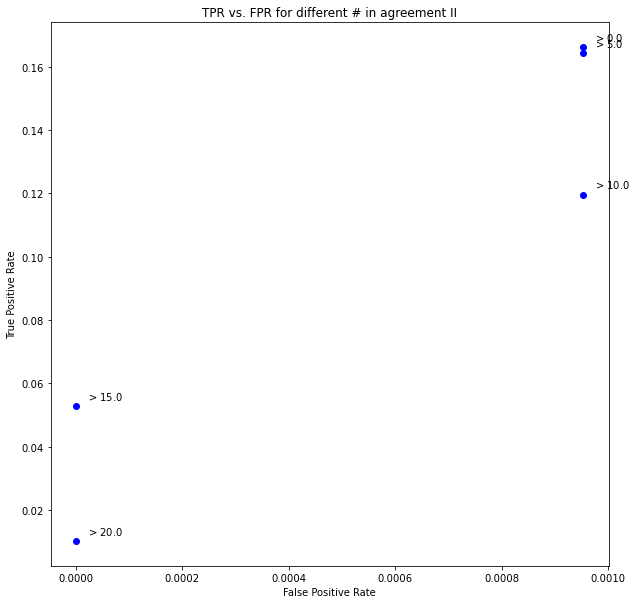

In [44]:
fig = plt.figure(figsize = (10,10))
plt.scatter(cutoff_confidence[:,2], cutoff_confidence[:,1], color = "blue")
for i in cutoff_confidence:
    plt.text(i[2]+.00002,i[1]+.002,"$>$"+str(i[0]))
plt.title("TPR vs. FPR for different # in agreement II")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [45]:
negativeI = 0
positiveI = 0
for j in Joined_ZTF_2018:
    correct_1a = "Ia" in j["sn_type"]
    if(correct_1a):
        positiveI += 1
    if(not(correct_1a)):
        negativeI += 1

In [46]:
cutoff_confidence_Ia = [] 
for i in tables:
    truepositive = 0
    falsepositive = 0
    for j in i[1]:
        correct_1a = "Ia" in j["Real_c"]
        classified_1a = "Ia" in j["Zooniverse_c"]
        if(correct_1a == True and classified_1a == True):
            truepositive += 1
        if(correct_1a != True and classified_1a == True):
            falsepositive += 1
    cutoff_confidence_Ia.append([i[0],truepositive/(positiveI),falsepositive/(negativeI),len(i[1]), truepositive, falsepositive])
cutoff_confidence_Ia = np.asarray(cutoff_confidence_Ia)

Text(0, 0.5, 'True Positive Rate')

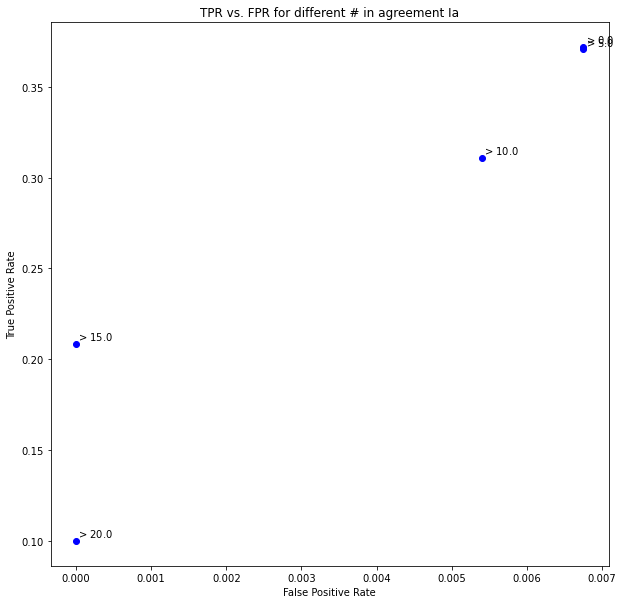

In [47]:
fig = plt.figure(figsize = (10,10))
plt.scatter(cutoff_confidence_Ia[:,2], cutoff_confidence_Ia[:,1], color = "blue")
for i in cutoff_confidence_Ia:
    plt.text(i[2]+.00002,i[1]+.002,"$>$"+str(i[0]))
plt.title("TPR vs. FPR for different # in agreement Ia")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [48]:
positiveI

801

In [49]:
positiveII

493

In [50]:
cutoff_confidence_Ia = [] 
for i in tables:
    truepositive = 0
    falsepositive = 0
    for j in i[1]:
        correct_1a = "Ia" in j["Real_c"]
        classified_1a = "Ia" in j["Zooniverse_c"]
        if(correct_1a == True and classified_1a == True):
            truepositive += 1
        if(correct_1a != True and classified_1a == True):
            print(j)
    break

  ZTF_Name                Version               Real_c Zooniverse_c
------------ ---------------------------------- ------ ------------
ZTF18aaxmhvk ZTF18aaxmhvk_20180614_P60_v1.ascii     Ic       Ia-91T
  ZTF_Name                 Version                Real_c Zooniverse_c
------------ ----------------------------------- ------- ------------
ZTF18abcfdzu ZTF18abcfdzu_20190704_P200_v1.ascii SLSN-II       Ia-csm
  ZTF_Name                 Version                 Real_c Zooniverse_c
------------ ------------------------------------ ------- ------------
ZTF18abcfdzu ZTF18abcfdzu_20180807_Keck1_v1.ascii SLSN-II       Ia-csm
  ZTF_Name                 Version                Real_c Zooniverse_c
------------ ------------------------------------ ------ ------------
ZTF18abuatfp ZTF18abuatfp_20181204_Keck1_v1.ascii    IIn       Ia-csm
  ZTF_Name                Version               Real_c Zooniverse_c
------------ ---------------------------------- ------ ------------
ZTF18aczcumi ZTF18aczcumi_2

In [51]:
tables[-1][1]

ZTF_Name,Version,Real_c,Zooniverse_c
str64,str64,str64,str64
ZTF18aagtcxj,ZTF18aagtcxj_20180410_P200_v1.ascii,Ia,Ia-norm
ZTF18aahfzea,ZTF18aahfzea_20180421_P60_v2.ascii,Ia,Ia-norm
ZTF18aahfzea,ZTF18aahfzea_20180421_P60_v1.ascii,Ia,Ia-norm
ZTF18aahjafd,ZTF18aahjafd_20180421_APO_v1.ascii,Ia,Ia-norm
ZTF18aainvic,ZTF18aainvic_20180622_TNG_v2.ascii,II,II-norm
ZTF18aajtlbf,ZTF18aajtlbf_20180420_P200_v1.ascii,Ia-91bg,Ia-91bg
ZTF18aakzliv,ZTF18aakzliv_20180516_P200_v1.ascii,Ia,Ia-norm
ZTF18aalcxig,ZTF18aalcxig_20180516_P200_v1.ascii,Ia,Ia-norm
ZTF18aaqgadq,ZTF18aaqgadq_20180516_P200_v1.ascii,Ia,Ia-norm


In [52]:
np.sum(ResultsTable_Zooniverse_Classes["Ia-norm"] > 6)

1641

In [53]:
positiveI

801

In [54]:
negativeIbIc = 0
positiveIbIc = 0
index = 0
indexes = []
for j in Joined_ZTF_2018:
    correct_1a = ("Ib" in j["sn_type"]) or ("Ic" in j["sn_type"]) 
    if(correct_1a):
        positiveIbIc += 1
        indexes.append(index)
    if(not(correct_1a)):
        negativeIbIc += 1
    index += 1

In [55]:
cutoff_confidence_IbIc = [] 
for i in tables:
    truepositiveIbIc = 0
    falsepositiveIbIc = 0
    JoinedResults = i[1]
    for j in JoinedResults:
        correct_1a = ("Ib" in j["Real_c"])
        classified_1a = ("Ib" in j["Zooniverse_c"])
        if(correct_1a == True and classified_1a == True):
            truepositiveIbIc += 1
        if(correct_1a != True and classified_1a == True):
            falsepositiveIbIc += 1
            
        correct_1a = ("Ic" in j["Real_c"])
        classified_1a = ("Ic" in j["Zooniverse_c"])
        if(correct_1a == True and classified_1a == True):
            truepositiveIbIc += 1
        if(correct_1a != True and classified_1a == True):
            falsepositiveIbIc += 1
        
    cutoff_confidence_IbIc.append([i[0],truepositiveIbIc/(positiveIbIc),falsepositiveIbIc/(negativeIbIc),len(JoinedResults), truepositiveIbIc, falsepositiveIbIc])
cutoff_confidence_IbIc = np.asarray(cutoff_confidence_IbIc)

Text(0, 0.5, 'True Positive Rate')

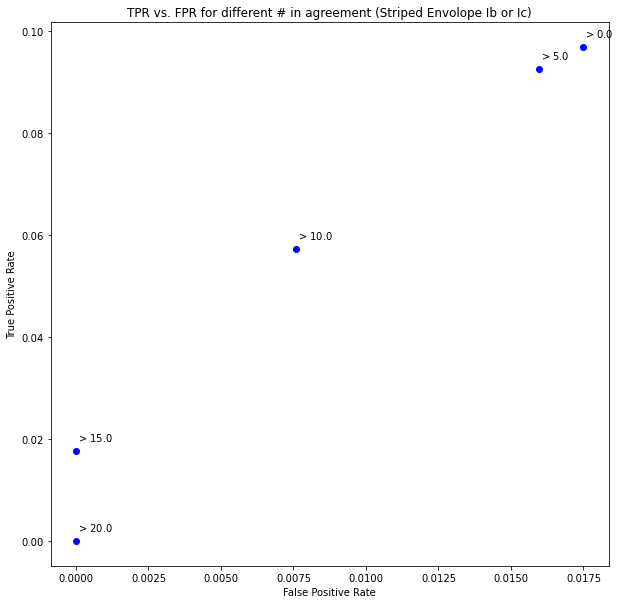

In [56]:
fig = plt.figure(figsize = (10,10))
plt.scatter(cutoff_confidence_IbIc[:,2], cutoff_confidence_IbIc[:,1], color = "blue")
for i in cutoff_confidence_IbIc:
    plt.text(i[2]+.00002,i[1]+.002,"$>$"+str(i[0]))
plt.title("TPR vs. FPR for different # in agreement (Striped Envolope Ib or Ic)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [57]:
for i in tables[-2][1]:
    if("Ib" in i["Real_c"]):
        print(i["Real_c"], i["Zooniverse_c"])

Ib Ib-norm
IIb Gal
Ibn Ibn


In [58]:
for i in tables[-2][1]:
    if("Ib" in i["Zooniverse_c"]):
        print(i["Real_c"], i["Zooniverse_c"])

Ib Ib-norm
Ibn Ibn


In [59]:
tables[0][1][tables[0][1]["Zooniverse_c"]=="NoMatch"]

ZTF_Name,Version,Real_c,Zooniverse_c
str64,str64,str64,str64


In [60]:
joined_results

Version,ZTF_Name,z_sntemplate,z_rlap,z_snid,z_snid_err,z_level,rank_1,sntemplate_1,rlap_1,c_snid_1,z_snid_1,z_snid_err_1,age_1,age_flag_1,rank_2,sntemplate_2,rlap_2,c_snid_2,z_snid_2,z_snid_err_2,age_2,age_flag_2,rank_3,sntemplate_3,rlap_3,c_snid_3,z_snid_3,z_snid_err_3,age_3,age_flag_3,rank_4,sntemplate_4,rlap_4,c_snid_4,z_snid_4,z_snid_err_4,age_4,age_flag_4,rank_5,sntemplate_5,rlap_5,c_snid_5,z_snid_5,z_snid_err_5,age_5,age_flag_5,subject_ids,NoMatch,#1,#2,#3,#4,#5
str64,str64,str12,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int32,int32,int32,int32,int32,int32,int32
AT2018hrg_20181103_P60_v1.ascii,AT2018hrg,sn2006bp,5.84,0.0068,0.0091,1,1,sn2006bp,5.84,II-norm,0.0068,0.0091,4.2,0,3,sn1987A,5.76,II-norm,0.0085,0.0094,-78.5,0,6,sn06bp,5.71,II-norm,0.0064,0.0092,7.2,0,18,sn1996cb,5.34,IIb,0.0158,0.0101,-18.0,0,35,lbv01ac,5.06,LBV,-0.0005,0.0045,-99.9,2,53623564,5,0,0,0,1,4
SN2017iuk_20181204_Keck1_v1.ascii,SN2017iuk,kcSB5,5.66,0.0378,0.0028,1,1,kcSB5,5.66,Gal,0.0378,0.0028,-99.9,2,2,kcSB1,5.43,Gal,0.037000000000000005,0.0028,-99.9,2,3,kcSB2,5.11,Gal,0.0369,0.003,-99.9,2,7,sn98bw,4.35,Ic-BL,0.0094,0.0179,15.7,0,11,sn2005la,3.83,Ibn,0.0197,0.0033,14.0,0,53623565,2,1,1,6,0,0
ZTF17aaajnki_20180320_P60_v1.ascii,ZTF17aaajnki,kcSB2,17.99,-0.0,0.0015,1,1,kcSB2,17.99,Gal,-0.0,0.0015,-99.9,2,2,kcSB1,17.3,Gal,0.0001,0.0016,-99.9,2,3,PS1-10bzj,10.61,Ic-SLSN,0.0003,0.0026,6.55,0,5,kcSB4,5.8,Gal,-0.0002,0.0041,-99.9,2,8,sn07it,5.28,II-norm,0.0007,0.0051,191.0,0,53623566,1,7,2,0,0,0
ZTF17aaajnki_20180320_P60_v2.ascii,ZTF17aaajnki,kcSB2,18.27,-0.0004,0.0015,1,1,kcSB2,18.27,Gal,-0.0004,0.0015,-99.9,2,2,kcSB1,17.68,Gal,-0.0003,0.0015,-99.9,2,3,PS1-10bzj,11.43,Ic-SLSN,-0.0001,0.0024,6.55,0,5,kcSB4,5.82,Gal,-0.0006,0.004,-99.9,2,8,sn07it,5.14,II-norm,0.0003,0.0051,191.0,0,53623567,1,10,2,0,0,0
ZTF17aaaobyl_20180826_P60_v2.ascii,ZTF17aaaobyl,agn,7.95,0.0017,0.003,1,1,agn,7.95,AGN,0.0017,0.003,-99.9,2,2,kcSB5,7.77,Gal,0.0021,0.0025,-99.9,2,3,kcSB4,7.62,Gal,0.0017,0.0025,-99.9,2,4,kcSc,7.52,Gal,0.0022,0.0025,-99.9,2,5,sn98S,7.15,IIn,0.004,0.0057,422.5,0,53623568,2,1,2,3,1,0
ZTF17aaapufz_20190304_P200_v1.ascii,ZTF17aaapufz,kcSc,28.52,0.0025,0.0006,1,1,kcSc,28.52,Gal,0.0025,0.0006,-99.9,2,2,kcSB4,26.83,Gal,0.0022,0.0007,-99.9,2,3,kcSB5,22.66,Gal,0.0025,0.0008,-99.9,2,8,agn,14.22,AGN,0.0023,0.0014,-99.9,2,9,qso,12.11,QSO,0.0025,0.0016,-100.0,2,53623569,1,9,0,1,0,0
ZTF17aaaukqn_20180904_P60_v1.ascii,ZTF17aaaukqn,sn97ef,6.95,0.3262,0.0146,0,1,sn97ef,6.95,Ic-BL,0.3262,0.0146,-14.0,0,7,sn2003W,4.54,Ia-norm,0.4743,0.0108,28.0,0,10,sn2005cf,4.3,Ia-norm,0.4432,0.0134,-6.6,0,16,sn1999gp,4.12,Ia-91T,0.4702,0.0123,35.1,0,17,sn03du,4.11,Ia-norm,0.4409,0.0122,-5.0,0,53623570,4,7,0,0,0,0
ZTF17aaawgkc_20180822_P60_v1.ascii,ZTF17aaawgkc,sn1995F,5.91,0.2735,0.0108,0,1,sn1995F,5.91,Ic-norm,0.2735,0.0108,88.8,1,3,sn93J,5.88,IIb,0.2642,0.0078,102.0,0,7,sn2008aq,5.64,IIb,0.2654,0.0075,101.0,1,12,sn2005az,5.42,Ic-norm,0.27,0.0098,87.3,0,16,sn2008D,5.24,Ib-norm,0.2808,0.0133,63.9,0,53623571,10,0,0,0,0,1
ZTF17aaayjzy_20191214_P60_v1.ascii,ZTF17aaayjzy,kcSB4,20.67,0.0479,0.0012,1,1,kcSB4,20.67,Gal,0.0479,0.0012,-99.9,2,2,kcSB5,19.9,Gal,0.0482,0.0012,-99.9,2,3,kcSc,18.67,Gal,0.0482,0.0013,-99.9,2,6,agn,13.59,AGN,0.0479,0.0021,-99.9,2,9,qso,10.66,QSO,0.048,0.0024,-100.0,2,53623572,1,4,2,1,1,0


Further Analysis
Weighing Users Plot number of classifications vs accuracy
Weighting Schemes
Isolate Users or subclasses
Cluster things that are wrong
PanStarrs Subtraction
Age vs Accuracy
Phase of the spectra vs Accuracyclassification[ccs_workflow]

In [61]:
wanted = classification[ccs_workflow]

In [62]:
users = np.unique(wanted["user_name"])

In [63]:
len(users)

3395

In [64]:
location_list = []
counter = 0
for i in users:
    counter += 1
    locations = np.where(wanted["user_name"] == i)
    location_list.append(np.asarray([i,locations[0],len(locations[0])]))
    if(counter % 100 == 0):
        print(counter)
location_list = np.asarray(location_list)

C:\Users\20xha\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300


(array([2.704e+03, 3.460e+02, 1.420e+02, 5.900e+01, 2.500e+01, 1.700e+01,
        1.500e+01, 1.600e+01, 1.100e+01, 6.000e+00, 5.000e+00, 6.000e+00,
        2.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

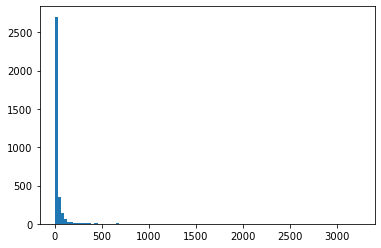

In [65]:
plt.hist(location_list[:, 2], bins = 100)

In [66]:
super_users = location_list[np.where(location_list[:,2] > 250)]

In [67]:
np.unique(location_list[:,2])

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104,
       106, 107, 108, 109, 110, 111, 113, 114, 115, 117, 118, 120, 121,
       122, 123, 125, 129, 130, 131, 132, 133, 134, 135, 141, 142, 143,
       145, 146, 147, 148, 149, 156, 158, 159, 160, 162, 163, 167, 171,
       175, 176, 177, 180, 183, 184, 186, 187, 188, 190, 193, 197, 198,
       200, 201, 202, 203, 204, 206, 207, 209, 212, 213, 215, 232, 233,
       239, 242, 244, 246, 249, 250, 253, 254, 255, 259, 264, 266, 270,
       271, 275, 276, 279, 281, 290, 301, 309, 313, 314, 320, 327, 341,
       354, 356, 363, 369, 372, 379, 384, 387, 400

In [69]:
results = []
for amount_done in np.unique(location_list[:,2]):
    right = 0
    total = 0
    for line in location_list[np.where(location_list[:,2] == amount_done)]:
        these_classes = classification[ccs_workflow][line[1]]
        for i in these_classes:
            subject_data = json.loads(i["subject_data"])
            annotations = json.loads(i["annotations"])
            value = annotations[0]["value"]
            ztf_name = subject_data[str(i["subject_ids"])]["!ZTF_Name"]
            ztf_version = subject_data[str(i["subject_ids"])]["!ZTF_Version"]
            type_location = np.where(final_rcf_table["ZTF_Name"] == ztf_name)[0]
            if(len(type_location) > 0 and value != None):
                type_location = type_location[0]
                snid_location = np.where(snidoutput["Version"] == ztf_version+".ascii")[0]
                response_number = response_dict[value]
                if(response_number != 0):
                    snid_class = snidoutput[snid_location]["c_snid_{}".format(response_number)]
                    actual_class = final_rcf_table[type_location]["sn_type"]
                    if(actual_class == snid_class):
                        right += 1
                    elif(actual_class in snid_class):
                        right += 1
                    elif("Ia" in actual_class and "Ia" in snid_class):
                        right += 1
                    elif("II" in actual_class and "II" in snid_class):
                        right += 1
                    elif("Ib" in actual_class and "Ib" in snid_class):
                        right += 1
                    elif("Ic" in actual_class and "Ic" in snid_class):
                        right += 1
                    total += 1
    results.append([amount_done, right, total, right/total])

<ipython-input-69-8ebf9ea94c2f>:21: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if(actual_class == snid_class):


KeyboardInterrupt: 

In [ ]:
results = np.asarray(results)

In [ ]:
plt.scatter(results[:,0], results[:,3])

In [ ]:
snidoutput[0]["c_snid_{}".format(1)]

In [ ]:
np.where(final_rcf_table["ZTF_Name"] == "ZTF18aabssth")[0]

In [ ]:
np.unique(final_rcf_table["sn_type"])

In [ ]:
np.unique(snidoutput["c_snid_1"])

In [ ]:
ztf_version+"ascii"

In [70]:
tables_age = []
for cut in rlap_cutoffs:
    Classes = Table(
                    names=("ZTF_Name", "Version", "Real_c", "Zooniverse_c"
                    ),
                    meta={"name": "Spectrum Results after Zooniverse"},
                    dtype=("U64", "U64", "U64", "U64",
                          )
                    )
    for line in Joined_ZTF_2018:
        row = []
        row.append(line["ZTF_Name"])
        row.append(line["Version"])
        row.append(line["sn_type"])
        best = []
        best_num = []
        for i in types:
            if(line[i] >= 9):
                if(line["rlap"] >= cut):
                    best.append(i)
                    best_num.append(line[i])
        if(len(best) != 0):
            row.append(best[np.argmax(best_num)])
            Classes.add_row(row)
    tables_age.append([cut, Classes])

In [71]:
snid_superfit_results = Table.read(r"C:\Users\20xha\Documents\GitHub\supernova-spectrum-analysis\superfit/results_2018_all_exact_z.txt", format = "ascii")
snid_superfit_results.rename_column('name', 'Version')

In [72]:

tprfpr_snid = Table.read(r"C:\Users\20xha\Documents\GitHub\supernova-spectrum-analysis\superfit/tprfpr_snid.ascii", format = "ascii")

In [73]:
snid_superfit_results[0]

ZTF_Name,classification,redshift,HGz,JD,JD_peak,phase,Version,flag,is_good_spec,SF_fit_1,chi2_fit_1,zfit_1,zfit_2,SF_fit_2,chi2_fit_2,c_snid,c_rlap,z_snid,SNR,short_name
str12,str9,float64,float64,float64,float64,float64,str39,int32,str5,str18,float64,float64,float64,str18,float64,str12,float64,float64,float64,str45
ZTF18aabssth,II,0.026,0.022914,2458186.5,2458218.66,-32.16,ZTF18aabssth_20180309_P60_v1.ascii,1,True,II,0.0018563307,0.026,0.026,II,0.001928962,IIb,7.86,0.0358,10.398875055231802,2007od/LRIS+2007-11-12 04:35:02.00


In [74]:
joined_phase = astropy.table.join(Classes_Final, snid_superfit_results)

In [75]:
phase_cutoffs = np.linspace(np.min(joined_phase["phase"]), np.max(joined_phase["phase"]), 100)

In [76]:
joined_phase[0]

ZTF_Name,Version,Zooniverse_c_broad,agreement_broad,Zooniverse_c,rlap,agreement,classification,redshift,HGz,JD,JD_peak,phase,flag,is_good_spec,SF_fit_1,chi2_fit_1,zfit_1,zfit_2,SF_fit_2,chi2_fit_2,c_snid,c_rlap,z_snid,SNR,short_name
str64,str64,str64,int32,str64,float32,int32,str9,float64,float64,float64,float64,float64,int32,str5,str18,float64,float64,float64,str18,float64,str12,float64,float64,float64,str45
ZTF18aabssth,ZTF18aabssth_20180309_P60_v1.ascii,II,9,IIb,8.07,7,II,0.026,0.022914,2458186.5,2458218.66,-32.16,1,True,II,0.0018563307,0.026,0.026,II,0.001928962,IIb,7.86,0.0358,10.398875055231802,2007od/LRIS+2007-11-12 04:35:02.00


In [77]:
negativeIa = 0
positiveIa = 0
for j in joined_phase:
    correct_1a = "Ia" in j["classification"]
    if(correct_1a):
        positiveIa += 1
    if(not(correct_1a)):
        negativeIa += 1

In [78]:
joined_phase

ZTF_Name,Version,Zooniverse_c_broad,agreement_broad,Zooniverse_c,rlap,agreement,classification,redshift,HGz,JD,JD_peak,phase,flag,is_good_spec,SF_fit_1,chi2_fit_1,zfit_1,zfit_2,SF_fit_2,chi2_fit_2,c_snid,c_rlap,z_snid,SNR,short_name
str64,str64,str64,int32,str64,float32,int32,str9,float64,float64,float64,float64,float64,int32,str5,str18,float64,float64,float64,str18,float64,str12,float64,float64,float64,str45
ZTF18aabssth,ZTF18aabssth_20180309_P60_v1.ascii,II,9,IIb,8.07,7,II,0.026,0.022914,2458186.5,2458218.66,-32.16,1,True,II,0.0018563307,0.026,0.026,II,0.001928962,IIb,7.86,0.0358,10.398875055231802,2007od/LRIS+2007-11-12 04:35:02.00
ZTF18aabxlsv,ZTF18aabxlsv_20180510_P60_v1.ascii,Ic,8,Ic-SLSN,8.57,6,Ib,0.055,0.04797,2458248.5,2458224.63,23.87,1,True,SLSN-I,0.002196394,0.055,0.055,SLSN-Ib,0.0035981005,Ic-SLSN,8.38,0.0559,9.143701096944973,PTF10nmn/LRIS+2010-07-07 00:00:00.00
ZTF18aabxlsv,ZTF18aabxlsv_20180517_P200_v1.ascii,Ic,7,Ic-SLSN,9.46,6,Ib,0.055,0.04797,2458255.5,2458224.63,30.87,1,False,SLSN-I,0.009288433,0.055,nan,nan,nan,Ic-norm,12.97,0.0567,10.675754681637988,PTF10nmn/LRIS+2010-07-07 00:00:00.00
ZTF18aabxlsv,ZTF18aabxlsv_20181110_Keck1_v1.ascii,II,11,IIn,8.91,8,Ib,0.055,0.04797,2458432.5,2458224.63,207.87,1,False,SLSN-I,0.0031540936,0.055,0.055,Ic-BL,0.0032135602,II-norm,9.64,0.0468,2.824064274131373,2015bn/X-Shooter+2016-03-05 00:00:00.00
ZTF18aaemivw,ZTF18aaemivw_20181104_P60_v1.ascii,Ia,11,Ia-csm,9.99,10,Ia,0.065,0.068069,2458426.5,2458423.99,2.51,1,True,IIn,0.0013187835,0.065,0.065,II,0.0014841992,Ia-csm,9.99,0.065,11.947405616578838,2005cp/DBSP+2005-10-24 00:00:00.00
ZTF18aagpzjk,ZTF18aagpzjk_20180320_P60_v1.ascii,Ia,9,Ia-csm,5.63,8,II,0.013,0.016308,2458197.5,2458217.61,-20.11,1,False,IIb,0.00922487,0.013,0.013,Ic-BL,0.010870627,Ia-norm,6.64,0.4645,22.770069221598078,2011dh/LRIS+2011-06-03 09:29:43.00
ZTF18aagpzjk,ZTF18aagpzjk_20180410_P200_v1.ascii,II,10,II-norm,15.86,9,II,0.013,0.016308,2458218.5,2458217.61,0.89,1,True,II,0.0044807694,0.013,0.013,II,0.004559476,II-norm,15.15,0.0132,9.438007745294799,2016esw/KAST+2016-09-10 04:50:52.00
ZTF18aagrdcs,ZTF18aagrdcs_20180327_P60_v1.ascii,Ib,6,Ib-norm,6.72,6,Ib,0.024,0.01814,2458204.5,2458217.84,-13.34,1,False,IIb,0.005011755,0.024,0.024,SLSN-I,0.005489839,Ia-91T,6.39,0.1643,11.04431273084555,2001ig/LRIS+2001-12-23 00:00:00.00
ZTF18aagrdcs,ZTF18aagrdcs_20180419_P200_v1.ascii,Ib,7,Ib-norm,18.05,7,Ib,0.024,0.01814,2458227.5,2458217.84,9.66,1,False,Ib,0.0056653935,0.024,0.024,Ib,0.0070888856,Ib-norm,17.7,0.0152,7.169928363085549,2009jf/FORS2+2009-10-28 00:00:00.00


In [79]:
tprfpr_zooniverse = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      )) 
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "Ia" in i["classification"]

                c_snid = "Ia" in i["Zooniverse_c"]
                if(c_actual == True and c_snid == True):
                    truepositive[0] += 1
                if(c_actual != True and c_snid == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveIa, falsepositive[0]/negativeIa]
        tprfpr_zooniverse.add_row(row)   

In [80]:
positiveIa

788

In [81]:
62/441

0.14058956916099774

Text(0, 0.5, 'True Positive Rate')

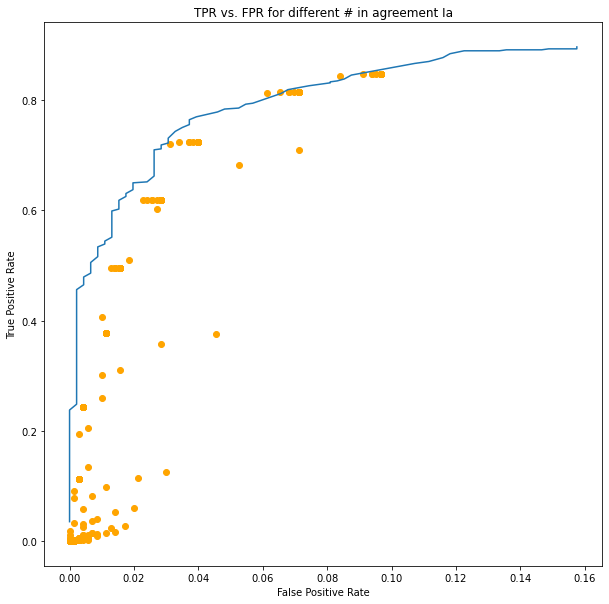

In [82]:
fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse["fpr_zooniverse"], tprfpr_zooniverse["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid["fpr_snid"], tprfpr_snid["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement Ia")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Text(0, 0.5, 'True Positive Rate')

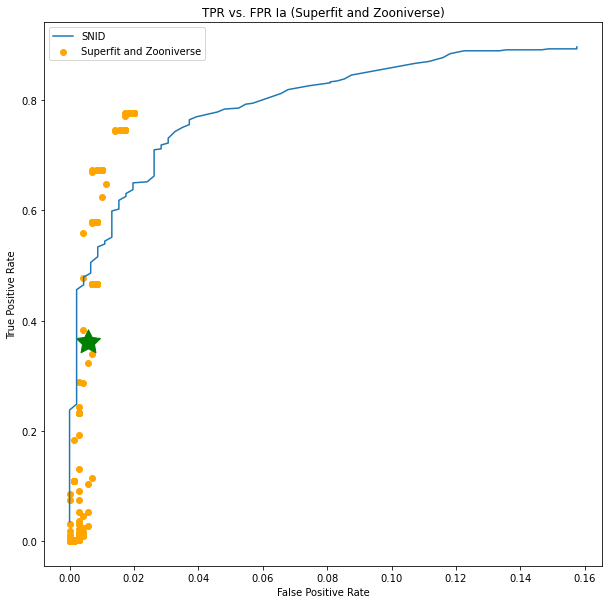

In [83]:
tprfpr_zooniverse_superfit_Ia = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "Ia" in i["classification"]
                
                c_zoonivserse = "Ia" in i["Zooniverse_c"]
                c_superfit = "Ia" in i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                if(c_actual == True and c == True):
                    truepositive[0] += 1
                if(c_actual != True and c == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveIa, falsepositive[0]/negativeIa]
        tprfpr_zooniverse_superfit_Ia.add_row(row)

fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_Ia["fpr_zooniverse"], tprfpr_zooniverse_superfit_Ia["tpr_zooniverse"], color = "orange", label = "Superfit and Zooniverse")
plt.plot(tprfpr_snid["fpr_snid"], tprfpr_snid["tpr_snid"], label = "SNID")
plt.title("TPR vs. FPR Ia (Superfit and Zooniverse)")
plt.scatter(tprfpr_zooniverse_superfit_Ia["fpr_zooniverse"][np.where(tprfpr_zooniverse_superfit_Ia["fpr_zooniverse"] < .01)][117], tprfpr_zooniverse_superfit_Ia["tpr_zooniverse"][np.where(tprfpr_zooniverse_superfit_Ia["fpr_zooniverse"] < .01)][117], s=640, marker=(5, 1), color = "green")
plt.legend(loc="upper left")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [84]:
np.max(tprfpr_zooniverse_superfit_Ia[np.where(tprfpr_zooniverse_superfit_Ia["fpr_zooniverse"] < .01)]["tpr_zooniverse"])

0.6725888324873096

In [85]:
np.argmax(tprfpr_zooniverse_superfit_Ia[np.where(tprfpr_zooniverse_superfit_Ia["fpr_zooniverse"] < .01)]["tpr_zooniverse"])

0

In [86]:
negativeII = 0
positiveII = 0
for name in np.unique(joined_phase["ZTF_Name"]):
    isII = False
    for j in joined_phase[np.where(name == joined_phase["ZTF_Name"])]:
        if ("II" in j["classification"]):
            isII = True
    if(isII):
        positiveII += 1
    else:
        negativeII += 1

In [87]:
tprfpr_snid_II = Table(
                names=("rlap", "tpr_snid", "fpr_snid"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64"
                      )) 
for rlap in np.linspace(0, 25, 251):
    truepositive = [0, 0, 0]
    falsepositive = [0, 0, 0]
    for name in np.unique(joined_phase["ZTF_Name"]):
        truepositivebool = False
        falsepositivebool = False
        for i in joined_phase[np.where(name == joined_phase["ZTF_Name"])]:
            if(i["rlap"] >= rlap):
                c_actual = "II" in i["classification"]
                c_snid = "II" in i["c_snid"]
                if(c_actual == True and c_snid == True):
                    truepositivebool = True
                if(c_actual != True and c_snid == True):
                    falsepositivebool = True
        if(truepositivebool):
            truepositive[0] += 1
        if(falsepositivebool):
            falsepositive[0] += 1
    row = [rlap, truepositive[0]/positiveII, falsepositive[0]/negativeII]
    tprfpr_snid_II.add_row(row)   

In [88]:
tprfpr_zooniverse_II = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      )) 
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "II" in i["classification"]

                c_snid = "II" in i["Zooniverse_c"]
                if(c_actual == True and c_snid == True):
                    truepositive[0] += 1
                if(c_actual != True and c_snid == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveII, falsepositive[0]/negativeII]
        tprfpr_zooniverse_II.add_row(row)   

Text(0, 0.5, 'True Positive Rate')

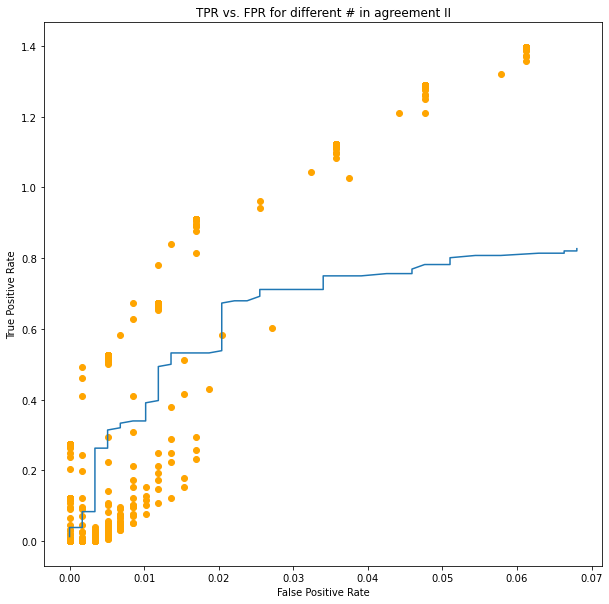

In [90]:
fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_II["fpr_zooniverse"], tprfpr_zooniverse_II["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid_II["fpr_snid"], tprfpr_snid_II["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement II")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [91]:
import matplotlib

In [92]:
plt.rcParams.update({'font.size': 20})

In [93]:
joined_phase

ZTF_Name,Version,Zooniverse_c_broad,agreement_broad,Zooniverse_c,rlap,agreement,classification,redshift,HGz,JD,JD_peak,phase,flag,is_good_spec,SF_fit_1,chi2_fit_1,zfit_1,zfit_2,SF_fit_2,chi2_fit_2,c_snid,c_rlap,z_snid,SNR,short_name
str64,str64,str64,int32,str64,float32,int32,str9,float64,float64,float64,float64,float64,int32,str5,str18,float64,float64,float64,str18,float64,str12,float64,float64,float64,str45
ZTF18aabssth,ZTF18aabssth_20180309_P60_v1.ascii,II,9,IIb,8.07,7,II,0.026,0.022914,2458186.5,2458218.66,-32.16,1,True,II,0.0018563307,0.026,0.026,II,0.001928962,IIb,7.86,0.0358,10.398875055231802,2007od/LRIS+2007-11-12 04:35:02.00
ZTF18aabxlsv,ZTF18aabxlsv_20180510_P60_v1.ascii,Ic,8,Ic-SLSN,8.57,6,Ib,0.055,0.04797,2458248.5,2458224.63,23.87,1,True,SLSN-I,0.002196394,0.055,0.055,SLSN-Ib,0.0035981005,Ic-SLSN,8.38,0.0559,9.143701096944973,PTF10nmn/LRIS+2010-07-07 00:00:00.00
ZTF18aabxlsv,ZTF18aabxlsv_20180517_P200_v1.ascii,Ic,7,Ic-SLSN,9.46,6,Ib,0.055,0.04797,2458255.5,2458224.63,30.87,1,False,SLSN-I,0.009288433,0.055,nan,nan,nan,Ic-norm,12.97,0.0567,10.675754681637988,PTF10nmn/LRIS+2010-07-07 00:00:00.00
ZTF18aabxlsv,ZTF18aabxlsv_20181110_Keck1_v1.ascii,II,11,IIn,8.91,8,Ib,0.055,0.04797,2458432.5,2458224.63,207.87,1,False,SLSN-I,0.0031540936,0.055,0.055,Ic-BL,0.0032135602,II-norm,9.64,0.0468,2.824064274131373,2015bn/X-Shooter+2016-03-05 00:00:00.00
ZTF18aaemivw,ZTF18aaemivw_20181104_P60_v1.ascii,Ia,11,Ia-csm,9.99,10,Ia,0.065,0.068069,2458426.5,2458423.99,2.51,1,True,IIn,0.0013187835,0.065,0.065,II,0.0014841992,Ia-csm,9.99,0.065,11.947405616578838,2005cp/DBSP+2005-10-24 00:00:00.00
ZTF18aagpzjk,ZTF18aagpzjk_20180320_P60_v1.ascii,Ia,9,Ia-csm,5.63,8,II,0.013,0.016308,2458197.5,2458217.61,-20.11,1,False,IIb,0.00922487,0.013,0.013,Ic-BL,0.010870627,Ia-norm,6.64,0.4645,22.770069221598078,2011dh/LRIS+2011-06-03 09:29:43.00
ZTF18aagpzjk,ZTF18aagpzjk_20180410_P200_v1.ascii,II,10,II-norm,15.86,9,II,0.013,0.016308,2458218.5,2458217.61,0.89,1,True,II,0.0044807694,0.013,0.013,II,0.004559476,II-norm,15.15,0.0132,9.438007745294799,2016esw/KAST+2016-09-10 04:50:52.00
ZTF18aagrdcs,ZTF18aagrdcs_20180327_P60_v1.ascii,Ib,6,Ib-norm,6.72,6,Ib,0.024,0.01814,2458204.5,2458217.84,-13.34,1,False,IIb,0.005011755,0.024,0.024,SLSN-I,0.005489839,Ia-91T,6.39,0.1643,11.04431273084555,2001ig/LRIS+2001-12-23 00:00:00.00
ZTF18aagrdcs,ZTF18aagrdcs_20180419_P200_v1.ascii,Ib,7,Ib-norm,18.05,7,Ib,0.024,0.01814,2458227.5,2458217.84,9.66,1,False,Ib,0.0056653935,0.024,0.024,Ib,0.0070888856,Ib-norm,17.7,0.0152,7.169928363085549,2009jf/FORS2+2009-10-28 00:00:00.00


In [98]:
tprfpr_zooniverse_superfit_II = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
falsepositive_names = []
for agreement in cutoffs:
    truepositive = [0, 0, 0]
    falsepositive = [0, 0, 0]
    for name in np.unique(joined_phase["ZTF_Name"]):
        truepositivebool = False
        falsepositivebool = False
        for i in joined_phase[np.where(name == joined_phase["ZTF_Name"])]:
            if(i["agreement_broad"] >= agreement):
                c_actual = "II" in i["classification"]

                c_zoonivserse = "II" in i["Zooniverse_c"]
                c_superfit = "II" in i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                if(c_actual == True and c == True):
                    truepositivebool = True
                if(c_actual != True and c == True):
                    falsepositivebool += True
                    falsepositive_names.append(name)
        truepositive[0] += truepositivebool
        falsepositive[0] += falsepositivebool
    row = [phase, agreement, truepositive[0]/positiveII, falsepositive[0]/negativeII]
    tprfpr_zooniverse_superfit_II.add_row(row)

Text(0, 0.5, 'True Positive Rate')

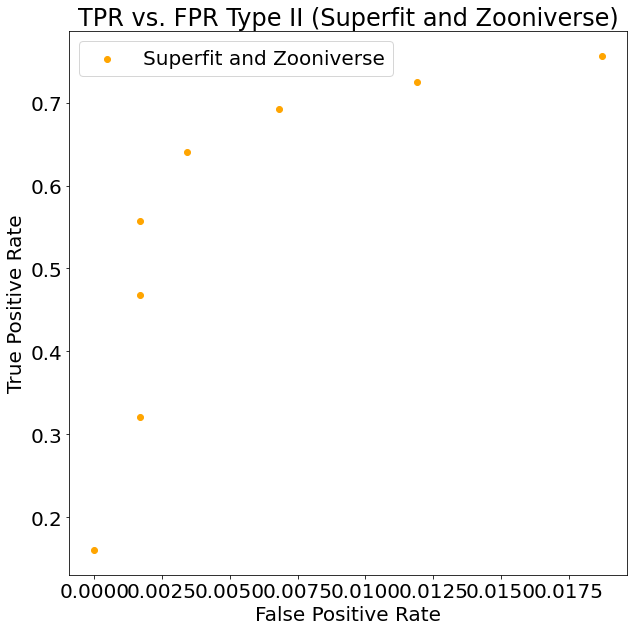

In [99]:
fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_II["fpr_zooniverse"], tprfpr_zooniverse_superfit_II["tpr_zooniverse"], color = "orange", label = "Superfit and Zooniverse")
#plt.plot(tprfpr_snid_II["fpr_snid"], tprfpr_snid_II["tpr_snid"], label = "SNID")
#plt.scatter(0, tprfpr_zooniverse_superfit_II["tpr_zooniverse"][np.argmax(tprfpr_zooniverse_superfit_II["tpr_zooniverse"])], s=640, marker=(5, 1), color = "green")
plt.title("TPR vs. FPR Type II (Superfit and Zooniverse)")
plt.legend(loc="upper left")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [96]:
tprfpr_zooniverse_superfit_II

phase,agreement,tpr_zooniverse,fpr_zooniverse
float64,float64,float64,float64
547.87,4.0,118.0,11.0
547.87,5.0,113.0,7.0
547.87,6.0,108.0,4.0
547.87,7.0,100.0,2.0
547.87,8.0,87.0,1.0
547.87,9.0,73.0,1.0
547.87,10.0,50.0,1.0
547.87,11.0,25.0,0.0


In [97]:
tprfpr_zooniverse_superfit_II[np.argmax(tprfpr_zooniverse_superfit_II["tpr_zooniverse"])]

phase,agreement,tpr_zooniverse,fpr_zooniverse
float64,float64,float64,float64
547.87,4.0,118.0,11.0


Text(0, 0.5, 'True Positive Rate')

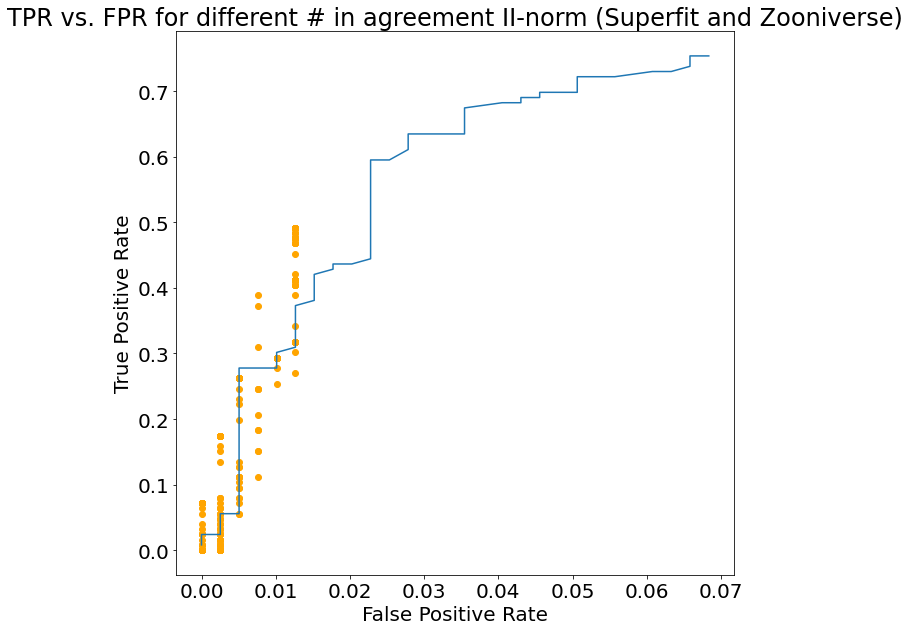

In [106]:
tprfpr_zooniverse_superfit_II = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "II" == i["classification"]
                
                c_zoonivserse = "II-norm" == i["Zooniverse_c"]
                c_superfit = "II" == i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                if(c_actual == True and c == True):
                    truepositive[0] += 1
                if(c_actual != True and c == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveII, falsepositive[0]/negativeII]
        tprfpr_zooniverse_superfit_II.add_row(row)

fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_II["fpr_zooniverse"], tprfpr_zooniverse_superfit_II["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid_II["fpr_snid"], tprfpr_snid_II["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement II-norm (Superfit and Zooniverse)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [107]:
negativeIb = 0
positiveIb = 0
for j in joined_phase:
    correct_1a = "Ib" in j["classification"]
    if(correct_1a):
        positiveIb += 1
    if(not(correct_1a)):
        negativeIb += 1

In [110]:
tprfpr_snid_Ib = Table(
                names=("rlap", "tpr_snid", "fpr_snid"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64"
                      )) 
for rlap in np.linspace(0, 25, 251):
    truepositive = [0, 0, 0]
    falsepositive = [0, 0, 0]
    for i in joined_phase:
        if(i["rlap"] >= rlap):
            c_actual = "Ib" in i["classification"]

            c_snid = "Ib" in i["c_snid"]
            if(c_actual == True and c_snid == True):
                truepositive[0] += 1
            if(c_actual != True and c_snid == True):
                falsepositive[0] += 1
    row = [rlap, truepositive[0]/positiveIb, falsepositive[0]/negativeIb]
    tprfpr_snid_Ib.add_row(row)

In [111]:
tprfpr_zooniverse_Ib = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      )) 
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "Ib" in i["classification"]

                c_snid = "Ib" in i["Zooniverse_c"]
                if(c_actual == True and c_snid == True):
                    truepositive[0] += 1
                if(c_actual != True and c_snid == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveIb, falsepositive[0]/negativeIb]
        tprfpr_zooniverse_Ib.add_row(row)   

Text(0, 0.5, 'True Positive Rate')

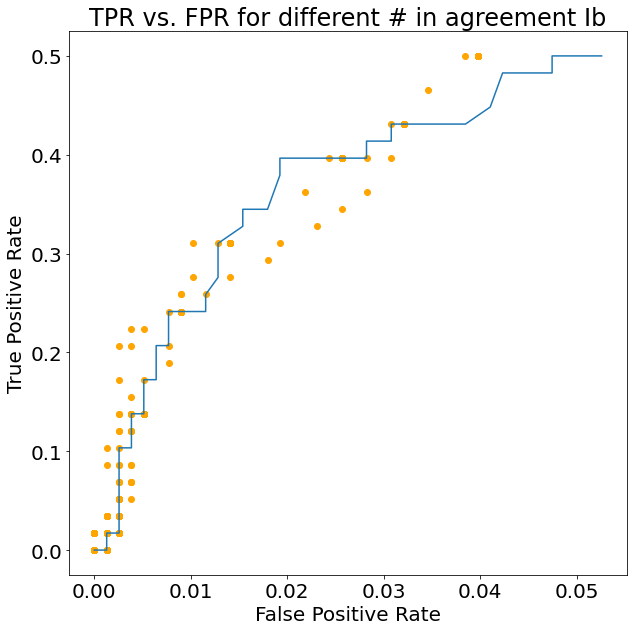

In [112]:
fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_Ib["fpr_zooniverse"], tprfpr_zooniverse_Ib["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid_Ib["fpr_snid"], tprfpr_snid_Ib["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement Ib")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Text(0, 0.5, 'True Positive Rate')

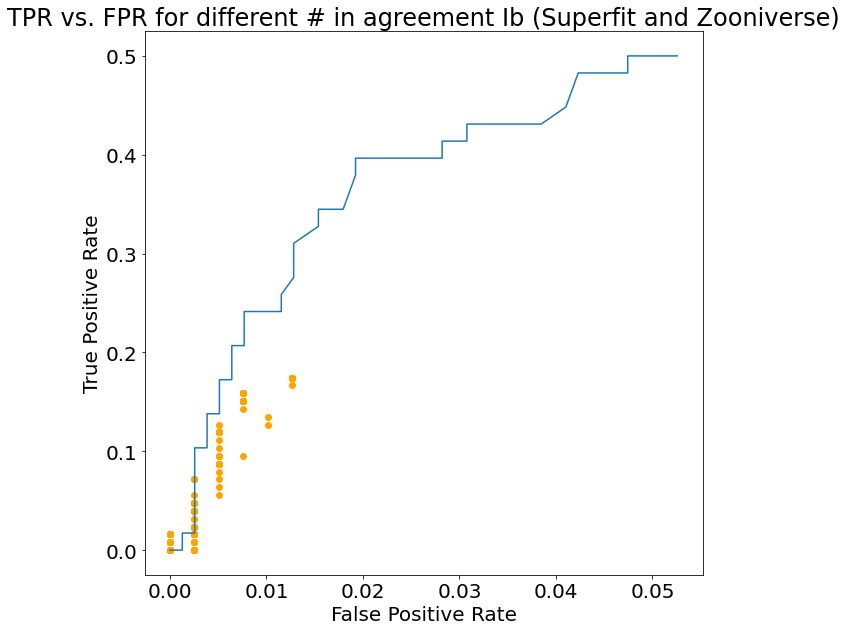

In [113]:
tprfpr_zooniverse_superfit_Ib = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "Ib" in i["classification"]
                
                c_zoonivserse = "Ib" in i["Zooniverse_c"]
                c_superfit = "Ib" in i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                if(c_actual == True and c == True):
                    truepositive[0] += 1
                if(c_actual != True and c == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveII, falsepositive[0]/negativeII]
        tprfpr_zooniverse_superfit_Ib.add_row(row)

fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_Ib["fpr_zooniverse"], tprfpr_zooniverse_superfit_Ib["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid_Ib["fpr_snid"], tprfpr_snid_Ib["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement Ib (Superfit and Zooniverse)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [114]:
negativeIc = 0
positiveIc = 0
for j in joined_phase:
    correct_1a = "Ic" in j["classification"]
    if(correct_1a):
        positiveIc += 1
    if(not(correct_1a)):
        negativeIc += 1

In [115]:
tprfpr_snid_Ic = Table(
                names=("rlap", "tpr_snid", "fpr_snid"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64"
                      )) 
for rlap in np.linspace(0, 25, 251):
    truepositive = [0, 0, 0]
    falsepositive = [0, 0, 0]
    for i in joined_phase:
        if(i["rlap"] >= rlap):
            c_actual = "Ic" in i["classification"]

            c_snid = "Ic" in i["c_snid"]
            if(c_actual == True and c_snid == True):
                truepositive[0] += 1
            if(c_actual != True and c_snid == True):
                falsepositive[0] += 1
    row = [rlap, truepositive[0]/positiveIc, falsepositive[0]/negativeIc]
    tprfpr_snid_Ic.add_row(row)

In [116]:
tprfpr_zooniverse_Ic = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      )) 
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "Ic" in i["classification"]

                c_snid = "Ic" in i["Zooniverse_c"]
                if(c_actual == True and c_snid == True):
                    truepositive[0] += 1
                if(c_actual != True and c_snid == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveIc, falsepositive[0]/negativeIc]
        tprfpr_zooniverse_Ic.add_row(row)   

Text(0, 0.5, 'True Positive Rate')

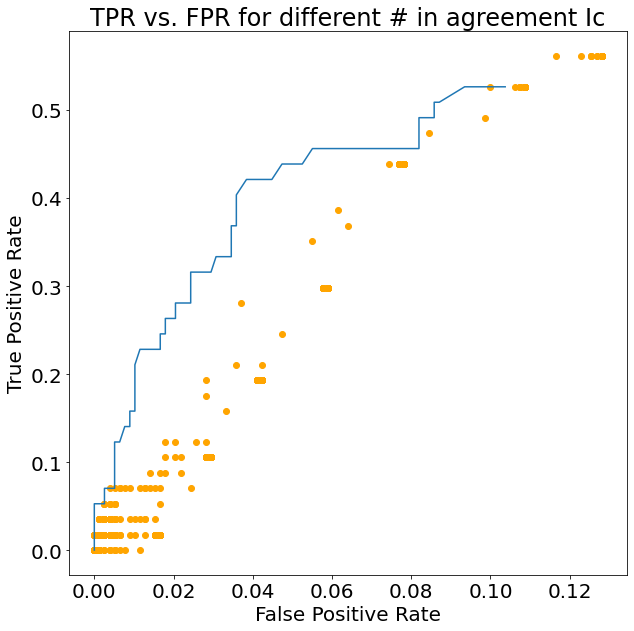

In [117]:
fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_Ic["fpr_zooniverse"], tprfpr_zooniverse_Ic["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid_Ic["fpr_snid"], tprfpr_snid_Ic["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement Ic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Text(0, 0.5, 'True Positive Rate')

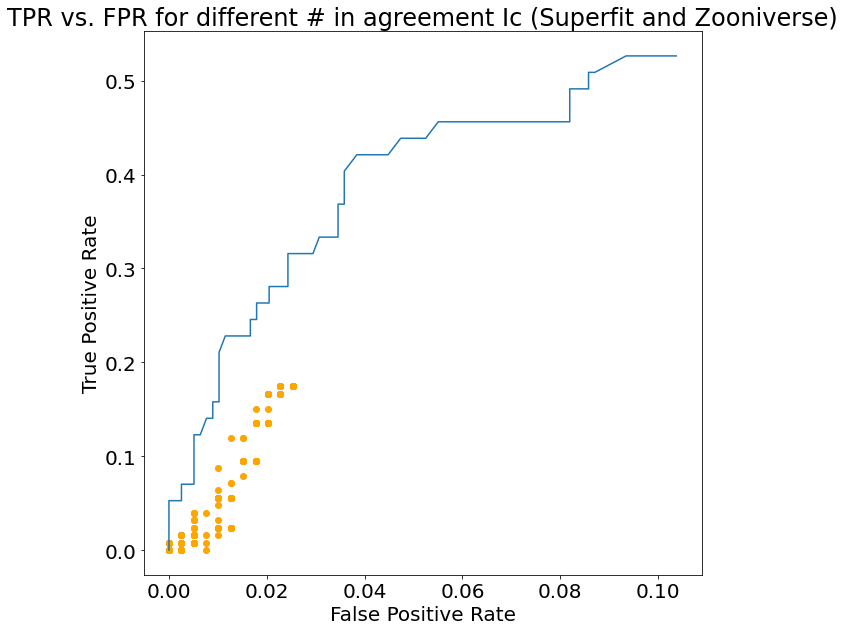

In [119]:
tprfpr_zooniverse_superfit_Ic = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "Ic" in i["classification"]
                
                c_zoonivserse = "Ic" in i["Zooniverse_c"]
                c_superfit = "Ic" in i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                if(c_actual == True and c == True):
                    truepositive[0] += 1
                if(c_actual != True and c == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveII, falsepositive[0]/negativeII]
        tprfpr_zooniverse_superfit_Ic.add_row(row)

fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_Ic["fpr_zooniverse"], tprfpr_zooniverse_superfit_Ic["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid_Ic["fpr_snid"], tprfpr_snid_Ic["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement Ic (Superfit and Zooniverse)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [120]:
positiveIbc = 0
negativeIbc = 0
for j in joined_phase:
    correct_1a = "Ib" in j["classification"] or "Ic" in j["classification"]
    if(correct_1a):
        positiveIbc += 1
    if(not(correct_1a)):
        negativeIbc += 1

In [122]:
tprfpr_snid_Ibc = Table(
                names=("rlap", "tpr_snid", "fpr_snid"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64"
                      )) 
for rlap in np.linspace(0, 25, 251):
    truepositive = [0, 0, 0]
    falsepositive = [0, 0, 0]
    for i in joined_phase:
        if(i["rlap"] >= rlap):
            c_actual = "Ib" in i["classification"] or "Ic" in i["classification"]
            c_snid = "Ib" in i["Zooniverse_c"] or "Ic" in i["Zooniverse_c"]
            
            if(c_actual == True and c_snid == True):
                truepositive[0] += 1
            if(c_actual != True and c_snid == True):
                falsepositive[0] += 1
    row = [rlap, truepositive[0]/positiveIbc, falsepositive[0]/negativeIbc]
    tprfpr_snid_Ibc.add_row(row)

In [123]:
tprfpr_zooniverse_Ibc = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      )) 
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "Ib" in i["classification"] or "Ic" in i["classification"]
                
                c_zoonivserse = "Ib" in i["Zooniverse_c"] or "Ic" in i["Zooniverse_c"]
                c_superfit = "Ib" in i["SF_fit_1"] or "Ic" in i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                
                if(c_actual == True and c == True):
                    truepositive[0] += 1
                if(c_actual != True and c == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveIbc, falsepositive[0]/negativeIbc]
        tprfpr_zooniverse_Ibc.add_row(row)   

(0.0, 0.5)

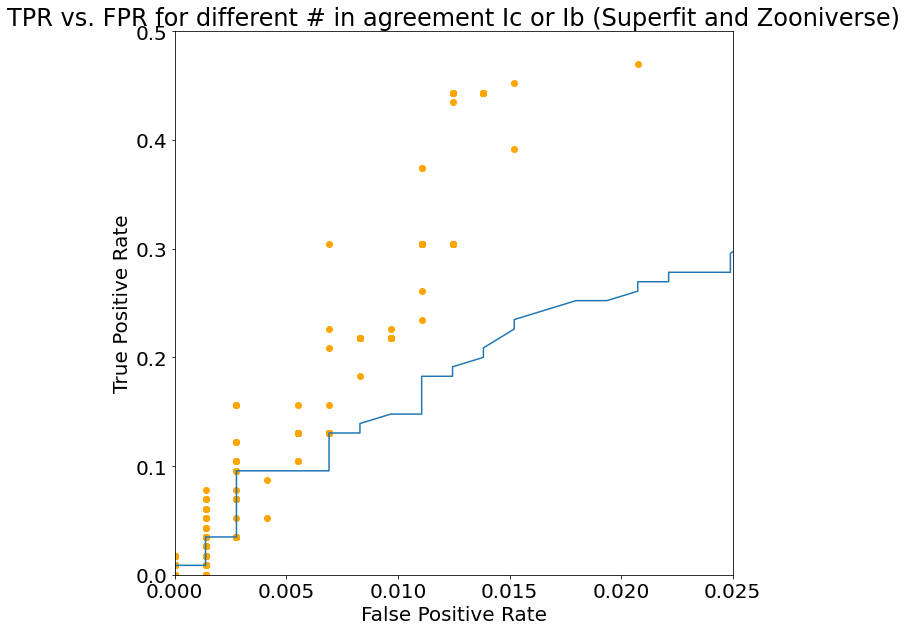

In [124]:
fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_Ibc["fpr_zooniverse"], tprfpr_zooniverse_Ibc["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid_Ibc["fpr_snid"], tprfpr_snid_Ibc["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement Ic or Ib (Superfit and Zooniverse)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim(0, 0.025)
plt.ylim(0, .5)

In [125]:
is_sedm = []
not_sedm = []
for i in joined_phase["Version"]:
    is_sedm.append("P60" in i)
    not_sedm.append(not("P60" in i))

Text(0, 0.5, 'True Positive Rate')

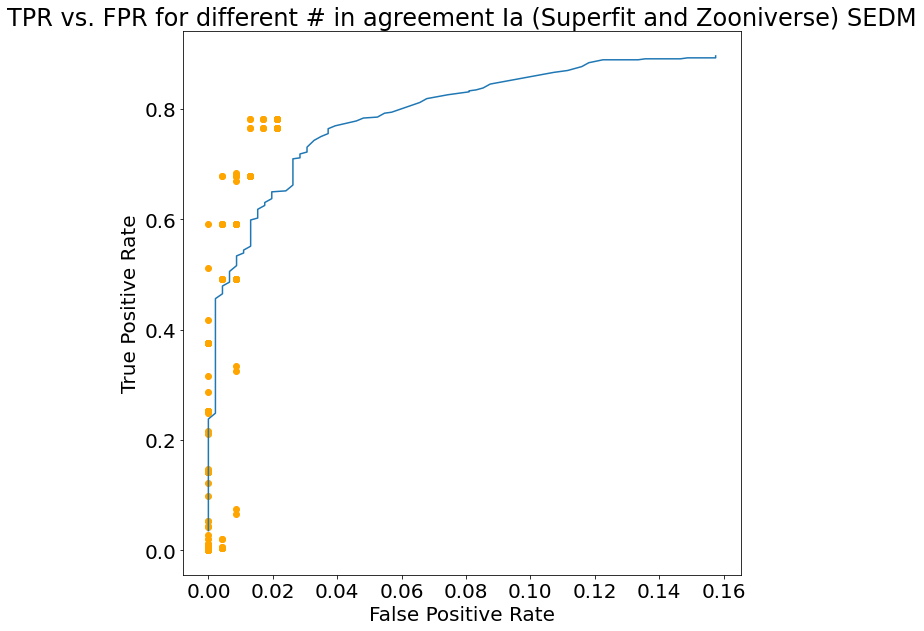

In [127]:
negativeIa = 0
positiveIa = 0
for j in joined_phase[is_sedm]:
    correct_1a = "Ia" in j["classification"]
    if(correct_1a):
        positiveIa += 1
    if(not(correct_1a)):
        negativeIa += 1

tprfpr_zooniverse_superfit_Ia = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase[is_sedm]:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "Ia" in i["classification"]
                
                c_zoonivserse = "Ia" in i["Zooniverse_c"]
                c_superfit = "Ia" in i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                if(c_actual == True and c == True):
                    truepositive[0] += 1
                if(c_actual != True and c == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveIa, falsepositive[0]/negativeIa]
        tprfpr_zooniverse_superfit_Ia.add_row(row)

fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_Ia["fpr_zooniverse"], tprfpr_zooniverse_superfit_Ia["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid["fpr_snid"], tprfpr_snid["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement Ia (Superfit and Zooniverse) SEDM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Text(0, 0.5, 'True Positive Rate')

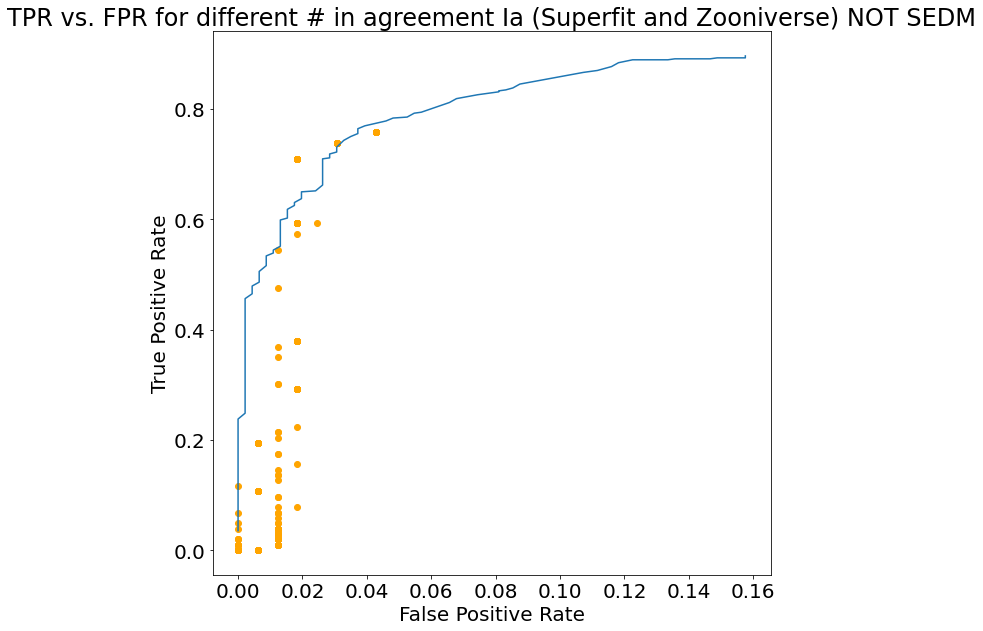

In [128]:
negativeIa = 0
positiveIa = 0
for j in joined_phase[not_sedm]:
    correct_1a = "Ia" in j["classification"]
    if(correct_1a):
        positiveIa += 1
    if(not(correct_1a)):
        negativeIa += 1

tprfpr_zooniverse_superfit_Ia = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase[not_sedm]:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "Ia" in i["classification"]
                
                c_zoonivserse = "Ia" in i["Zooniverse_c"]
                c_superfit = "Ia" in i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                if(c_actual == True and c == True):
                    truepositive[0] += 1
                if(c_actual != True and c == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveIa, falsepositive[0]/negativeIa]
        tprfpr_zooniverse_superfit_Ia.add_row(row)

fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_Ia["fpr_zooniverse"], tprfpr_zooniverse_superfit_Ia["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid["fpr_snid"], tprfpr_snid["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement Ia (Superfit and Zooniverse) NOT SEDM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [129]:
np.unique(joined_phase["classification"])

II
II-87A
IIb
IIn
Ia
Ia-02cx
Ia-91T
Ia-91bg
Ia-CSM
Ia-SC
Ib


In [149]:
np.unique(joined_phase["SF_fit_1"])

"""super chandra"""
Ca-Ib
FBOT
II
II-flash
IIb
IIb-flash
IIn
Ia 02es-like
Ia 91T-like
Ia 91bg-like


In [131]:
"IIn" in np.unique(joined_phase["classification"])

True

In [132]:
"IIn" in np.unique(joined_phase["Zooniverse_c"])

True

In [133]:
"IIn" in np.unique(joined_phase["SF_fit_1"])

True

In [154]:
joined_phase[np.where(joined_phase["classification"] == "II")]["ZTF_Name", "classification", "SF_fit_1", "Zooniverse_c"]

ZTF_Name,classification,SF_fit_1,Zooniverse_c
str64,str9,str18,str64
ZTF18aabssth,II,II,IIb
ZTF18aagpzjk,II,IIb,Ia-csm
ZTF18aagpzjk,II,II,II-norm
ZTF18aahfqbc,II,II,II-norm
ZTF18aahhqih,II,IIb,IIn
ZTF18aainvic,II,II,II-norm
ZTF18aainvic,II,II,II-norm
ZTF18aainvic,II,II,II-norm
ZTF18aainvic,II,II,Gal


In [148]:
II_superfit = 0
II_zooniverse = 0
for i in joined_phase:
    II_superfit += "II-norm" == i["Zooniverse_c"]
    II_zooniverse += "II" == i["SF_fit_1"]
    
print(II_superfit, II_zooniverse)

101 143


189


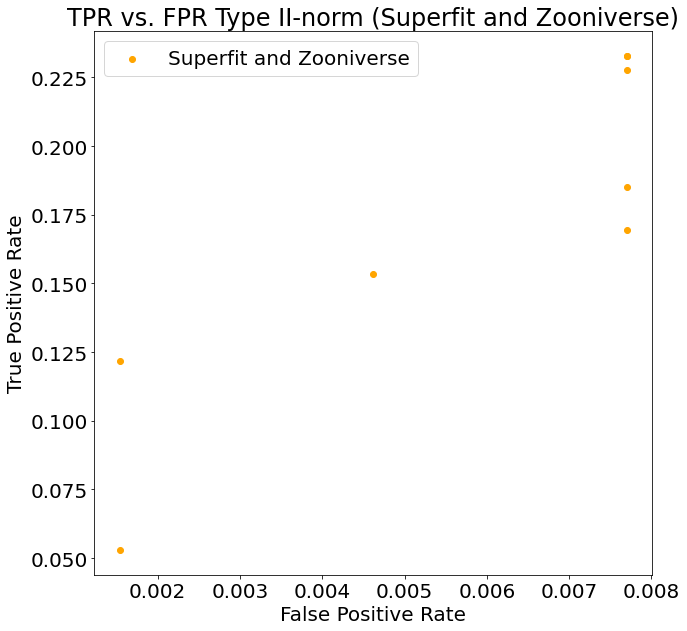

In [158]:
negativeII = 0
positiveII = 0
for j in joined_phase:
    correct_1a = "II" == j["classification"]
    if(correct_1a):
        positiveII += 1
    if(not(correct_1a)):
        negativeII += 1

tprfpr_zooniverse_superfit_II = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
for agreement in cutoffs:
    truepositive = [0, 0, 0]
    falsepositive = [0, 0, 0]
    for name in np.unique(joined_phase["ZTF_Name"]):
        truepositivebool = False
        falsepositivebool = False
        for i in joined_phase[np.where(name == joined_phase["ZTF_Name"])]:
            if(i["agreement_broad"] >= agreement):
                c_actual = "II" == i["classification"]

                c_zoonivserse = "II-norm" == i["Zooniverse_c"]
                c_superfit = "II" == i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                if(c_actual == True and c == True):
                    truepositivebool = True
                if(c_actual != True and c == True):
                    falsepositivebool += True
        truepositive[0] += truepositivebool
        falsepositive[0] += falsepositivebool
    row = [phase, agreement, truepositive[0]/positiveII, falsepositive[0]/negativeII]
    tprfpr_zooniverse_superfit_II.add_row(row)
    
fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_II["fpr_zooniverse"], tprfpr_zooniverse_superfit_II["tpr_zooniverse"], color = "orange", label = "Superfit and Zooniverse")
#plt.plot(tprfpr_snid_II["fpr_snid"], tprfpr_snid_II["tpr_snid"], label = "SNID")
#plt.scatter(0, tprfpr_zooniverse_superfit_II["tpr_zooniverse"][np.argmax(tprfpr_zooniverse_superfit_II["tpr_zooniverse"])], s=640, marker=(5, 1), color = "green")
plt.title("TPR vs. FPR Type II-norm (Superfit and Zooniverse)")
plt.legend(loc="upper left")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
print(positiveII)

31


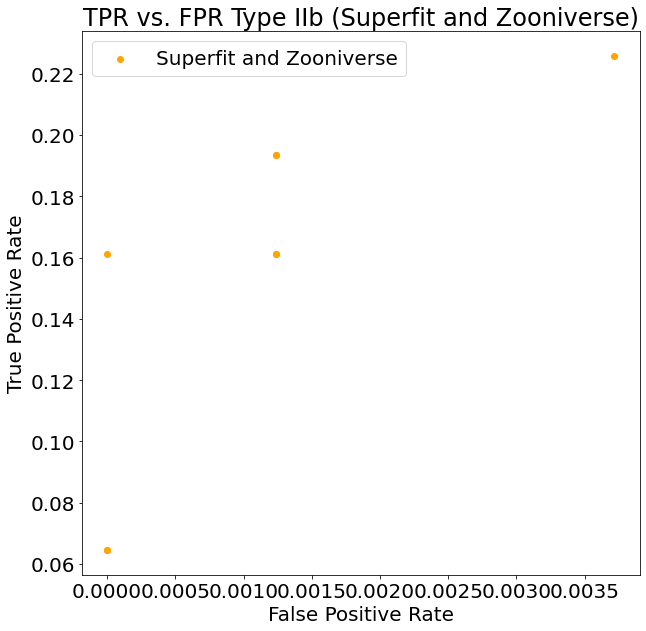

In [161]:
negativeII = 0
positiveII = 0
for j in joined_phase:
    correct_1a = "IIb" == j["classification"]
    if(correct_1a):
        positiveII += 1
    if(not(correct_1a)):
        negativeII += 1

tprfpr_zooniverse_superfit_II = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
for agreement in cutoffs:
    truepositive = [0, 0, 0]
    falsepositive = [0, 0, 0]
    for name in np.unique(joined_phase["ZTF_Name"]):
        truepositivebool = False
        falsepositivebool = False
        for i in joined_phase[np.where(name == joined_phase["ZTF_Name"])]:
            if(i["agreement_broad"] >= agreement):
                c_actual = "IIb" == i["classification"]

                c_zoonivserse = "IIb" in i["Zooniverse_c"]
                c_superfit = "IIb" in i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                if(c_actual == True and c == True):
                    truepositivebool = True
                if(c_actual != True and c == True):
                    falsepositivebool += True
        truepositive[0] += truepositivebool
        falsepositive[0] += falsepositivebool
    row = [phase, agreement, truepositive[0]/positiveII, falsepositive[0]/negativeII]
    tprfpr_zooniverse_superfit_II.add_row(row)
    
fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_II["fpr_zooniverse"], tprfpr_zooniverse_superfit_II["tpr_zooniverse"], color = "orange", label = "Superfit and Zooniverse")
#plt.plot(tprfpr_snid_II["fpr_snid"], tprfpr_snid_II["tpr_snid"], label = "SNID")
#plt.scatter(0, tprfpr_zooniverse_superfit_II["tpr_zooniverse"][np.argmax(tprfpr_zooniverse_superfit_II["tpr_zooniverse"])], s=640, marker=(5, 1), color = "green")
plt.title("TPR vs. FPR Type IIb (Superfit and Zooniverse)")
plt.legend(loc="upper left")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
print(positiveII)

35


phase,agreement,tpr_zooniverse,fpr_zooniverse
float64,float64,float64,float64
547.87,4.0,0.0,0.0012453300124533001
547.87,5.0,0.0,0.0012453300124533001
547.87,6.0,0.0,0.0012453300124533001
547.87,7.0,0.0,0.0
547.87,8.0,0.0,0.0
547.87,9.0,0.0,0.0
547.87,10.0,0.0,0.0
547.87,11.0,0.0,0.0


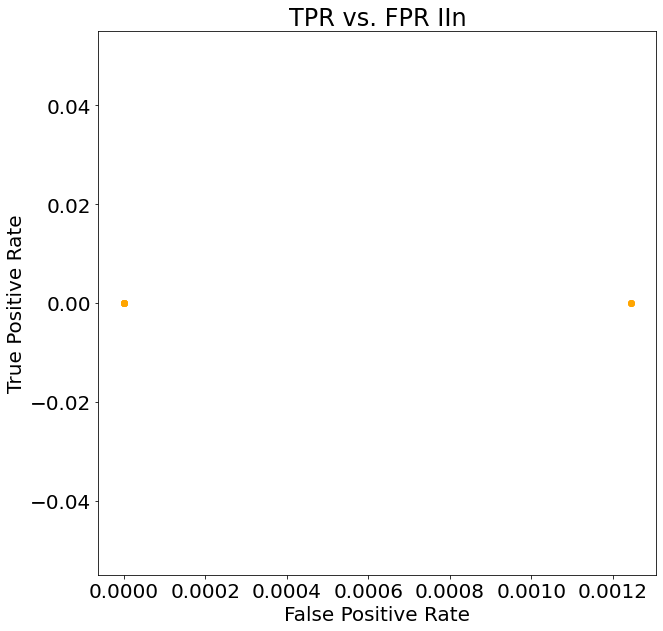

In [144]:
negativeIa = 0
positiveIa = 0
for j in joined_phase:
    correct_1a = "IIn" == j["classification"]
    if(correct_1a):
        positiveIa += 1
    if(not(correct_1a)):
        negativeIa += 1

tprfpr_zooniverse_superfit_Ia = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
for agreement in cutoffs:
    truepositive = [0, 0, 0]
    falsepositive = [0, 0, 0]
    for i in joined_phase:
        if(i["agreement"] >= agreement):
            c_actual = "IIn" == i["classification"]

            c_zoonivserse = "IIn" in i["Zooniverse_c"]
            c_superfit = "IIn" in i["SF_fit_1"]
            c = c_zoonivserse and c_superfit
            if(c_actual == True and c == True):
                truepositive[0] += 1
            if(c_actual != True and c == True):
                falsepositive[0] += 1
    row = [phase, agreement, truepositive[0]/positiveIa, falsepositive[0]/negativeIa]
    tprfpr_zooniverse_superfit_Ia.add_row(row)

fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_Ia["fpr_zooniverse"], tprfpr_zooniverse_superfit_Ia["tpr_zooniverse"], color = "orange")
#plt.plot(tprfpr_snid["fpr_snid"], tprfpr_snid["tpr_snid"])
plt.title("TPR vs. FPR IIn")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
print(positiveIa)
tprfpr_zooniverse_superfit_Ia

phase,agreement,tpr_zooniverse,fpr_zooniverse
float64,float64,float64,float64
547.87,4.0,0.5952380952380952,0.005063291139240506
547.87,5.0,0.5634920634920635,0.002531645569620253
547.87,6.0,0.5555555555555556,0.002531645569620253
547.87,7.0,0.47619047619047616,0.0
547.87,8.0,0.4365079365079365,0.0
547.87,9.0,0.373015873015873,0.0
547.87,10.0,0.2698412698412698,0.0
547.87,11.0,0.14285714285714285,0.0


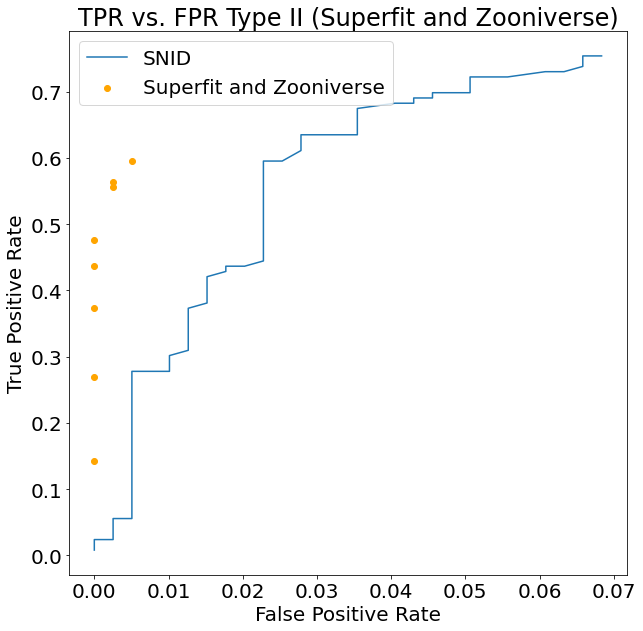

In [142]:
tprfpr_zooniverse_superfit_II = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
for agreement in cutoffs:
    truepositive = [0, 0, 0]
    falsepositive = [0, 0, 0]
    for name in np.unique(joined_phase["ZTF_Name"]):
        truepositivebool = False
        falsepositivebool = False
        for i in joined_phase[np.where(name == joined_phase["ZTF_Name"])]:
            if(i["agreement_broad"] >= agreement):
                c_actual = "II" in i["classification"]

                c_zoonivserse = "II" in i["Zooniverse_c_broad"]
                c_superfit = "II" in i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                if(c_actual == True and c == True):
                    truepositivebool = True
                if(c_actual != True and c == True):
                    falsepositivebool += True
        truepositive[0] += truepositivebool
        falsepositive[0] += falsepositivebool
    row = [phase, agreement, truepositive[0]/positiveII, falsepositive[0]/negativeII]
    tprfpr_zooniverse_superfit_II.add_row(row)
    
fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_II["fpr_zooniverse"], tprfpr_zooniverse_superfit_II["tpr_zooniverse"], color = "orange", label = "Superfit and Zooniverse")
plt.plot(tprfpr_snid_II["fpr_snid"], tprfpr_snid_II["tpr_snid"], label = "SNID")
#plt.scatter(0, tprfpr_zooniverse_superfit_II["tpr_zooniverse"][np.argmax(tprfpr_zooniverse_superfit_II["tpr_zooniverse"])], s=640, marker=(5, 1), color = "green")
plt.title("TPR vs. FPR Type II (Superfit and Zooniverse)")
plt.legend(loc="upper left")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
tprfpr_zooniverse_superfit_II

phase,agreement,tpr_zooniverse,fpr_zooniverse
float64,float64,float64,float64
547.87,4.0,0.6507936507936508,0.007594936708860759
547.87,5.0,0.6111111111111112,0.002531645569620253
547.87,6.0,0.6031746031746031,0.002531645569620253
547.87,7.0,0.5238095238095238,0.0
547.87,8.0,0.47619047619047616,0.0
547.87,9.0,0.4126984126984127,0.0
547.87,10.0,0.2777777777777778,0.0
547.87,11.0,0.15079365079365079,0.0


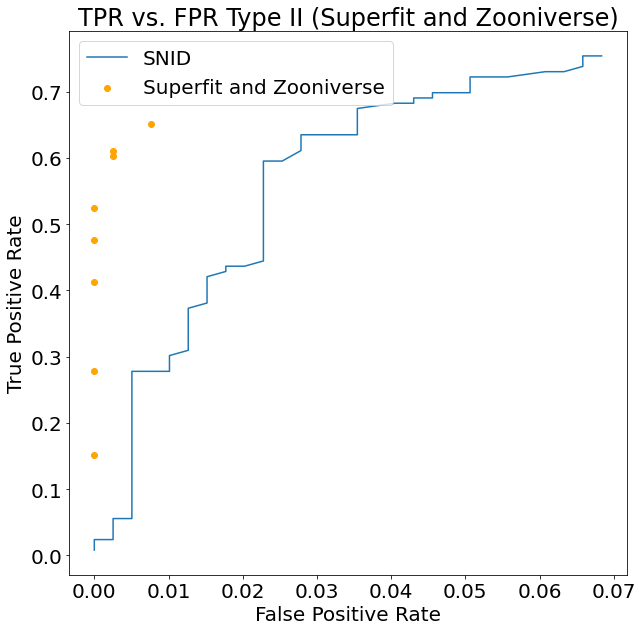

In [164]:
negativeII = 0
positiveII = 0
for name in np.unique(joined_phase["ZTF_Name"]):
    isII = False
    for j in joined_phase[np.where(name == joined_phase["ZTF_Name"])]:
        if ("II" in j["classification"]):
            isII = True
    if(isII):
        positiveII += 1
    else:
        negativeII += 1
tprfpr_zooniverse_superfit_II = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
for agreement in cutoffs:
    truepositive = [0, 0, 0]
    falsepositive = [0, 0, 0]
    for name in np.unique(joined_phase["ZTF_Name"]):
        truepositivebool = False
        falsepositivebool = False
        for i in joined_phase[np.where(name == joined_phase["ZTF_Name"])]:
            if(i["agreement_broad"] >= agreement):
                c_actual = "II" in i["classification"]

                c_zoonivserse = "II" in i["Zooniverse_c"]
                c_superfit = "II" in i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                if(c_actual == True and c == True):
                    truepositivebool = True
                if(c_actual != True and c == True):
                    falsepositivebool += True
        truepositive[0] += truepositivebool
        falsepositive[0] += falsepositivebool
    row = [phase, agreement, truepositive[0]/positiveII, falsepositive[0]/negativeII]
    tprfpr_zooniverse_superfit_II.add_row(row)
    
fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_II["fpr_zooniverse"], tprfpr_zooniverse_superfit_II["tpr_zooniverse"], color = "orange", label = "Superfit and Zooniverse")
plt.plot(tprfpr_snid_II["fpr_snid"], tprfpr_snid_II["tpr_snid"], label = "SNID")
#plt.scatter(0, tprfpr_zooniverse_superfit_II["tpr_zooniverse"][np.argmax(tprfpr_zooniverse_superfit_II["tpr_zooniverse"])], s=640, marker=(5, 1), color = "green")
plt.title("TPR vs. FPR Type II (Superfit and Zooniverse)")
plt.legend(loc="upper left")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
tprfpr_zooniverse_superfit_II